# Biweekly Report 3

# Jake Watts

# Visualizing ReLU and ELU activations

After training and testing the Xception network with both the ReLU and ELU activation functions I wanted to visualize the activations taking place on both models and see if I could notice any difference in how the ELU and ReLu activate as the ELU performed better than the ReLU on the the test data.

In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import os

Mounting Google Drive to load my models.

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading trained Xception models, one with ReLU activaion and the other with ELU activation.

In [ ]:
model_relu = load_model('/content/gdrive/My Drive/cifar10_xception_relu1.h5')

In [ ]:
model_elu = load_model('/content/gdrive/My Drive/cifar10_xception_elu.h5')

First I wanted to visualize the functions to compare them. I did so with the help of the following tutorial (http://saikatbasak.in/sigmoid-vs-relu-vs-elu/).

The ReLU and ELU functions are the same for $x > 0$. The difference is that the ReLU is equal to zero for $x < 0$ while ELU less than 0 is equal to $\alpha(e^x-1)$ and in this plot $\alpha$ is equal to one. Since ELU allows for negative values it makes the mean activation closer to zero which is beneficial for learning.

Text(0.5, 1.0, 'ELU')

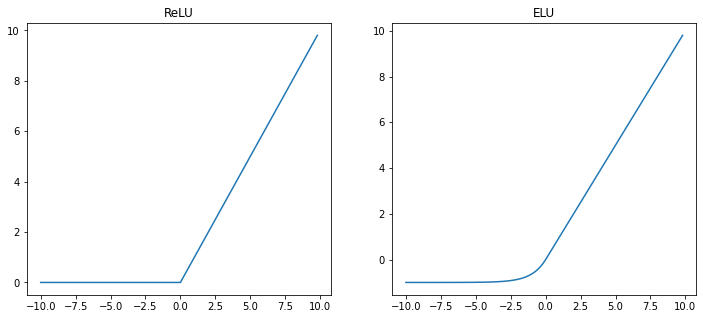

In [ ]:
X = np.arange(-10, 10, .2)
Y = np.linspace(0, len(X), len(X))

def relu(x):
    return np.maximum(0, x)

relu1 = relu(X)

def elu(arr, alpha):
    a = []
    for x in arr:
        if x >= 0:
            a.append(x)
        else:
            a.append(alpha * (np.exp(x)-1))
    return a

elu1 = elu(X, 1.0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(X, relu1)
ax1.set_title('ReLU')
ax2.plot(X, elu1)
ax2.set_title('ELU')

Loading Cifar-10 data.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


Predicting using the Xception model with ReLU activation on a image in the dataset and saving the layer activations.

In [ ]:
layer_outputs = [layer.output for layer in model_relu.layers[:64]] 
activation_model = Model(inputs=model_relu.input, outputs=layer_outputs)
activations_relu = activation_model.predict(x_test[1:2])

The image I am predicting on is a boat and is shown below.

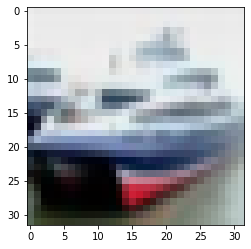

In [ ]:
plt.imshow(x_test[1])

Here I create a function to visualize the layer of the model containing activation functions. The code was created by modifying code from the following link (https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md).

In [ ]:
def plot_activations(activations, act_funct):
  # numbers for layers containing activation functions
  nums = [3, 6, 9, 16, 19, 26, 29, 36, 39, 42, 45, 47, 50, 59]

  for i, num in zip(range(len(nums)), nums):
    name = act_funct + str(i)  
    layer_activation = activations[num]
    size = layer_activation.shape[1]
    width = layer_activation.shape[3]
    img_per_row = 16
    img_per_col = width // 16

    display_grid = np.zeros((size * img_per_col, img_per_row * size))
    for col in range(img_per_col):
      for row in range(img_per_row):
        channel_image = layer_activation[0, :, :, col * img_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, 
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.grid(False)
    plt.title(name)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

The plot below shows all the activations for activation layers on the Xception model with ReLU activation. The first layer contains some images that still resemble the boat while subsequent layers seem to be able to detect more compliated patterns. However as the number of layers increase the acivations are upon an increasingly simplified images and I suspect that the layers towards the end may not be picking up on as much as the beginnning layers.

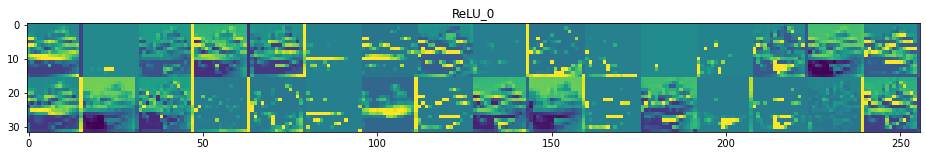

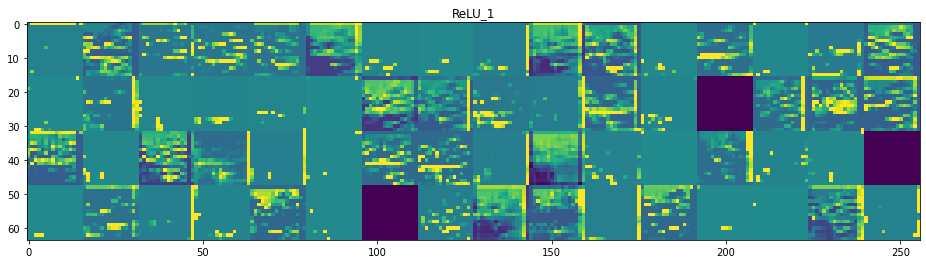

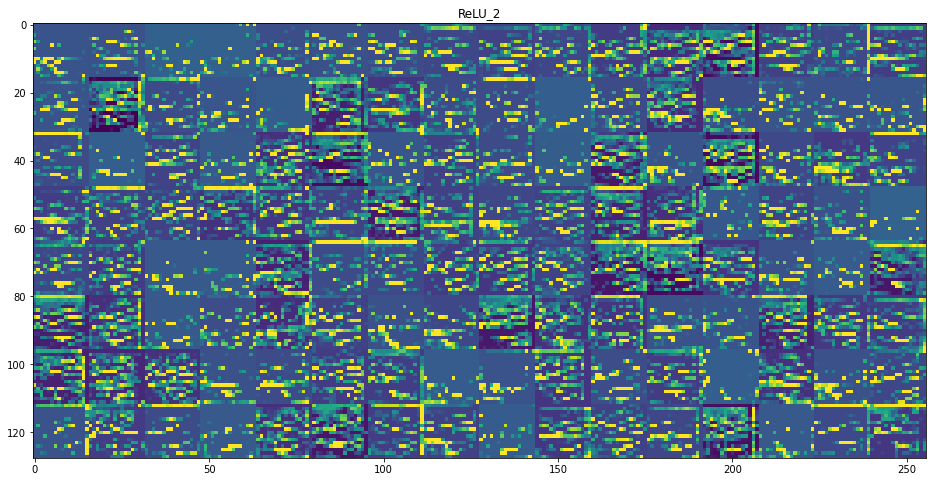

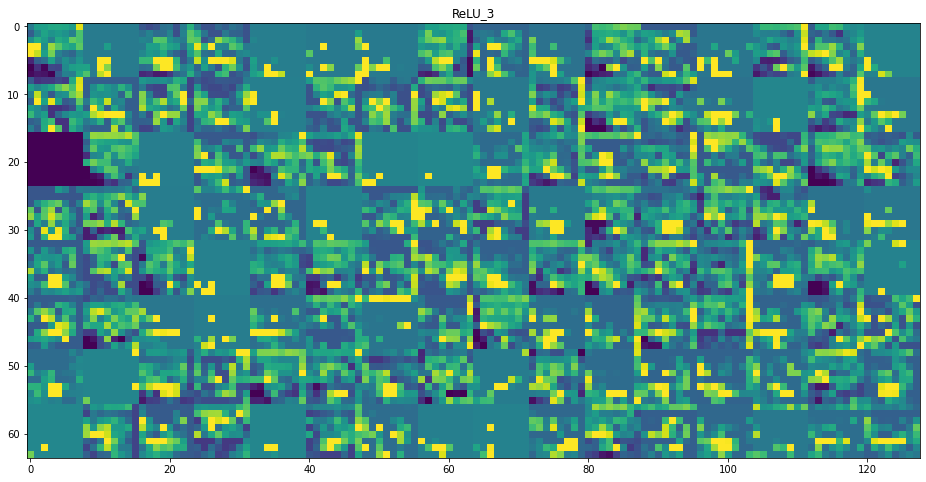

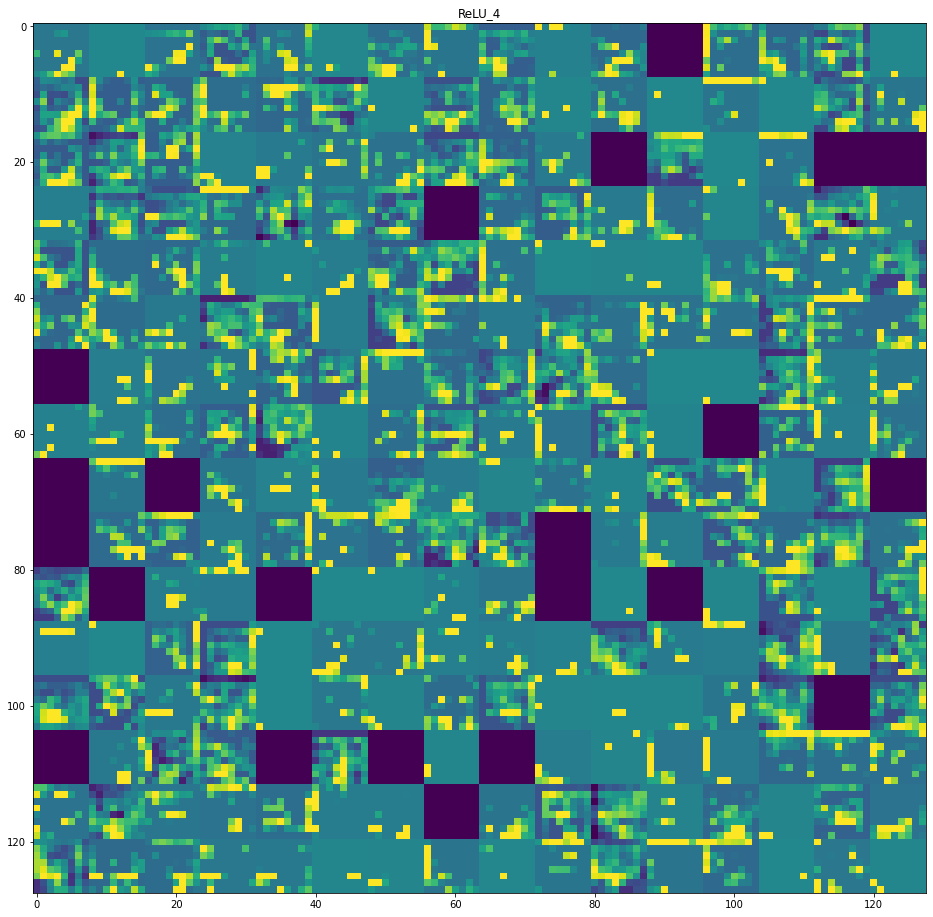

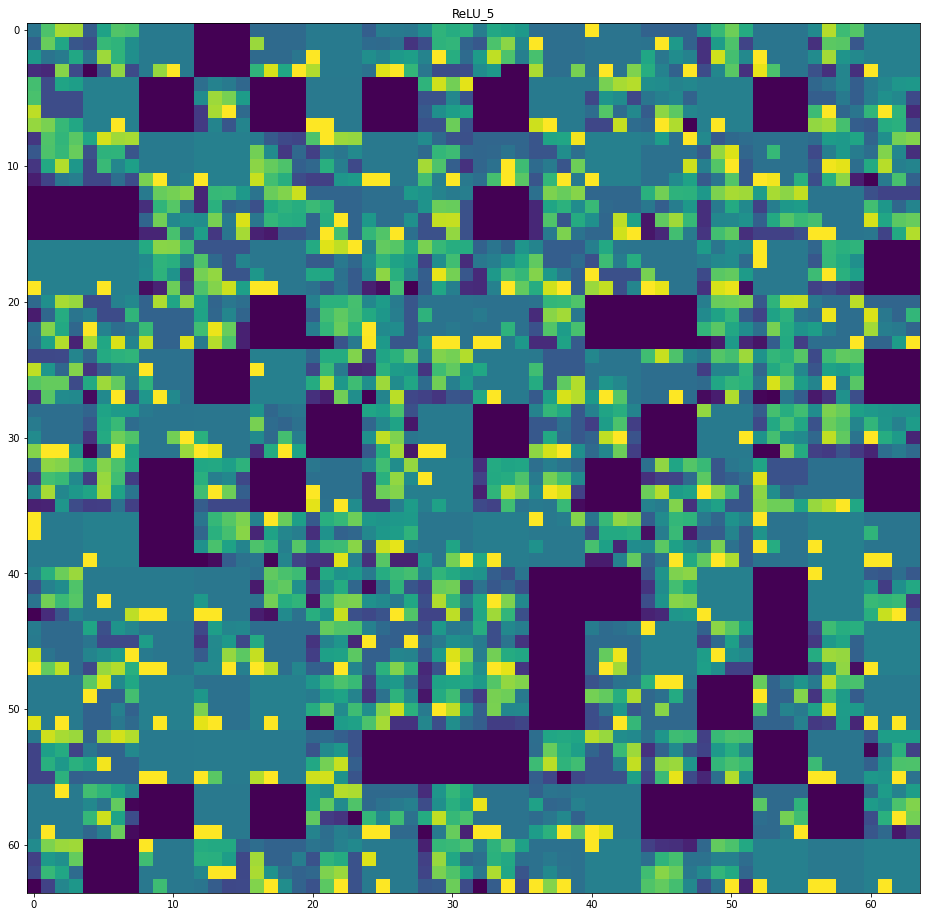

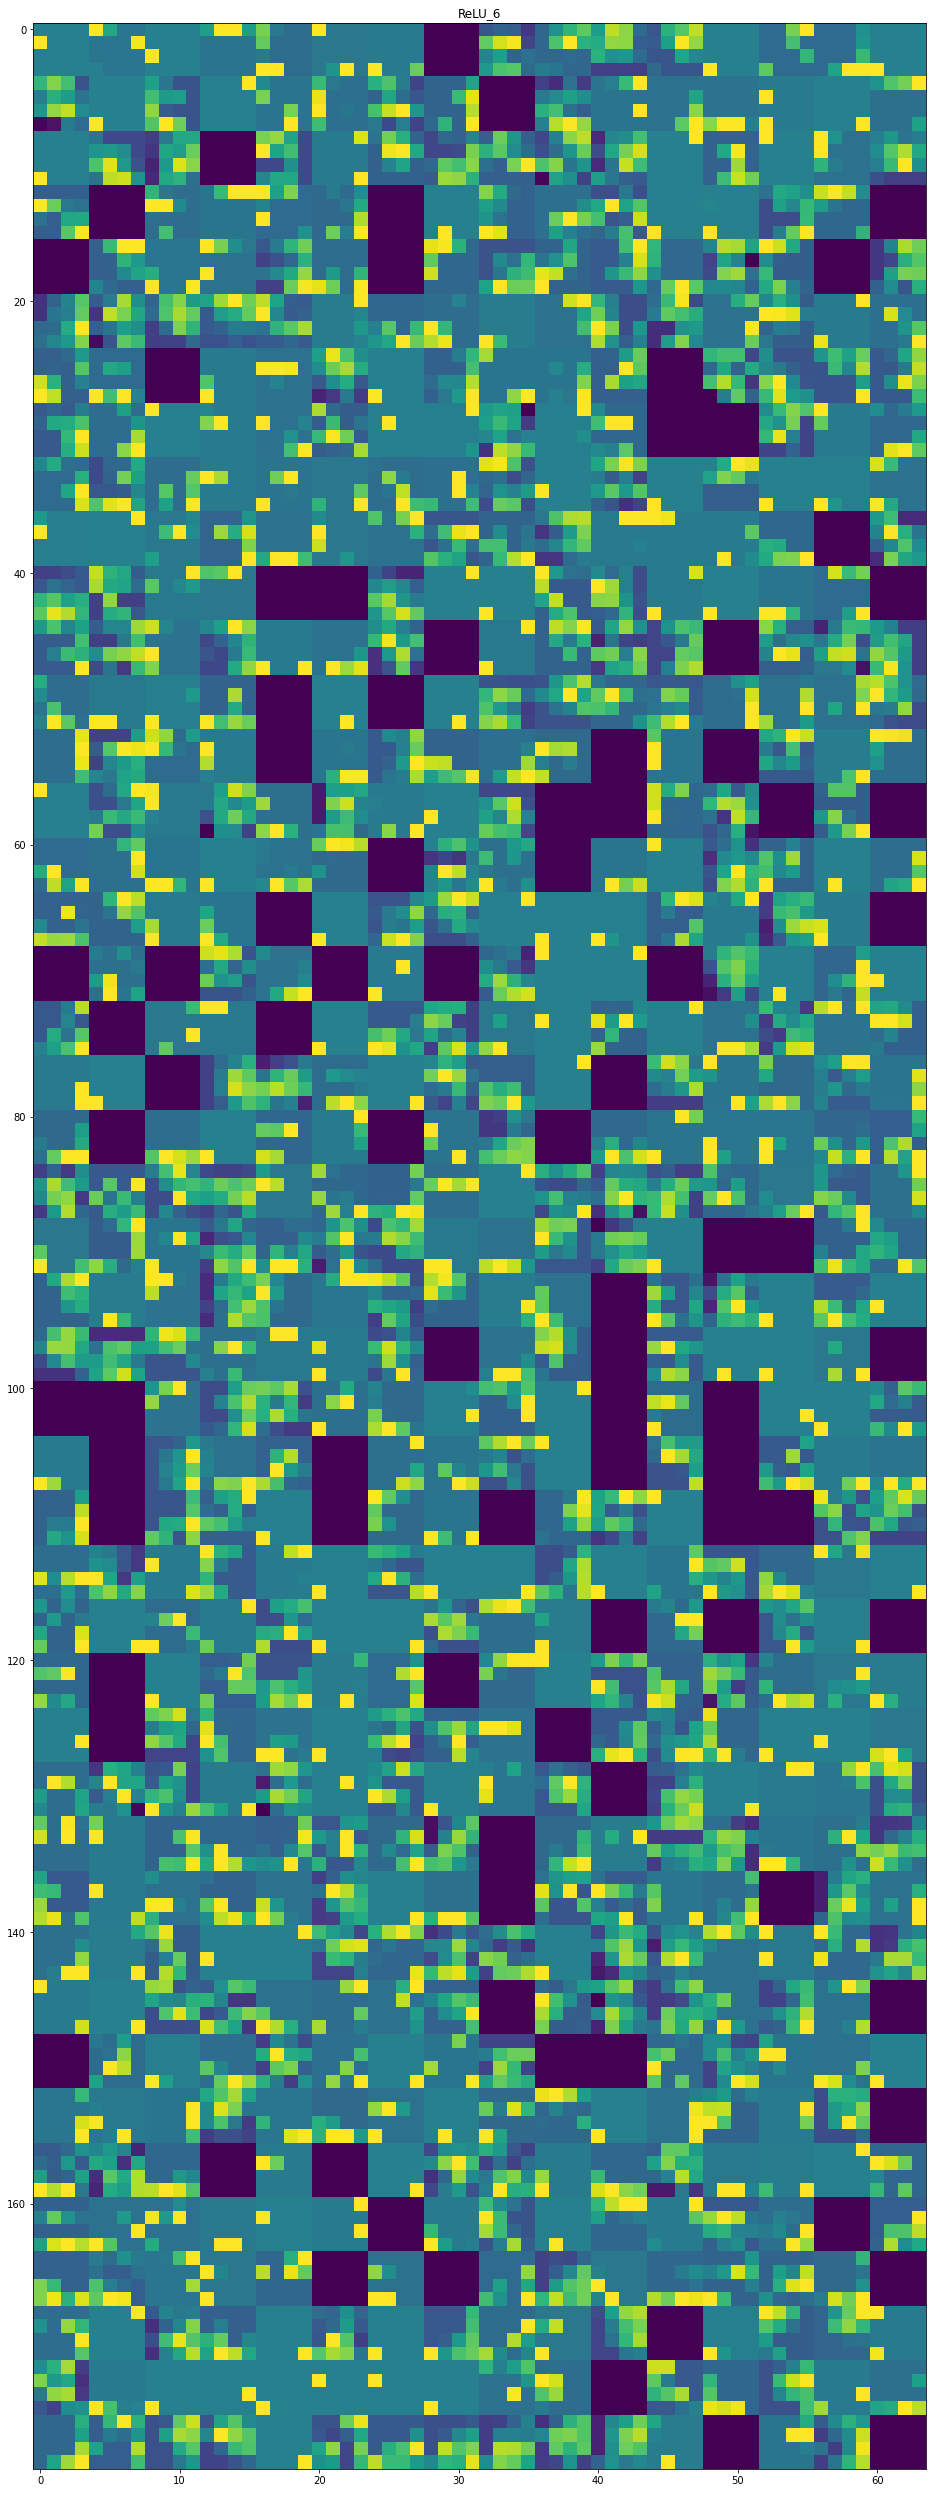

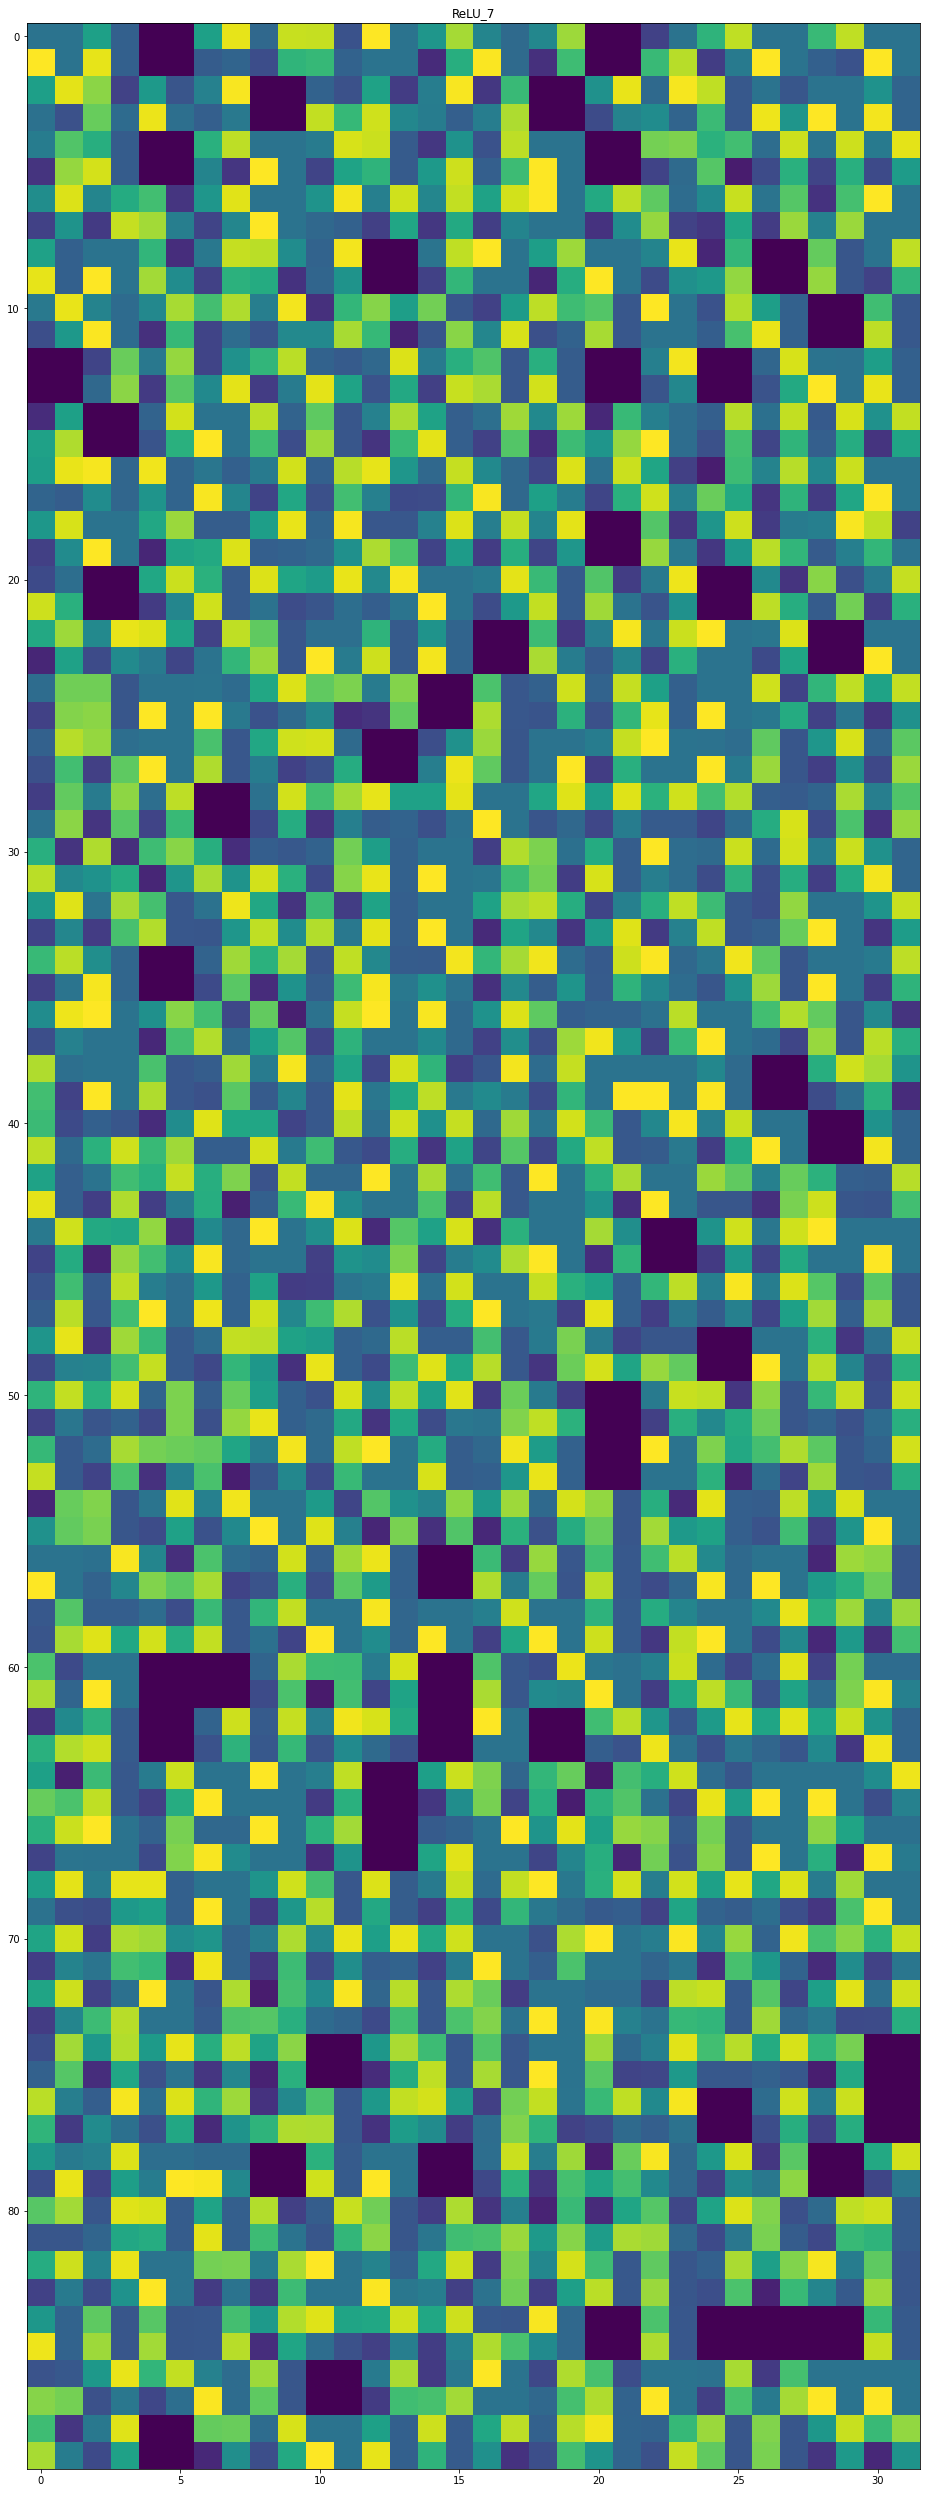

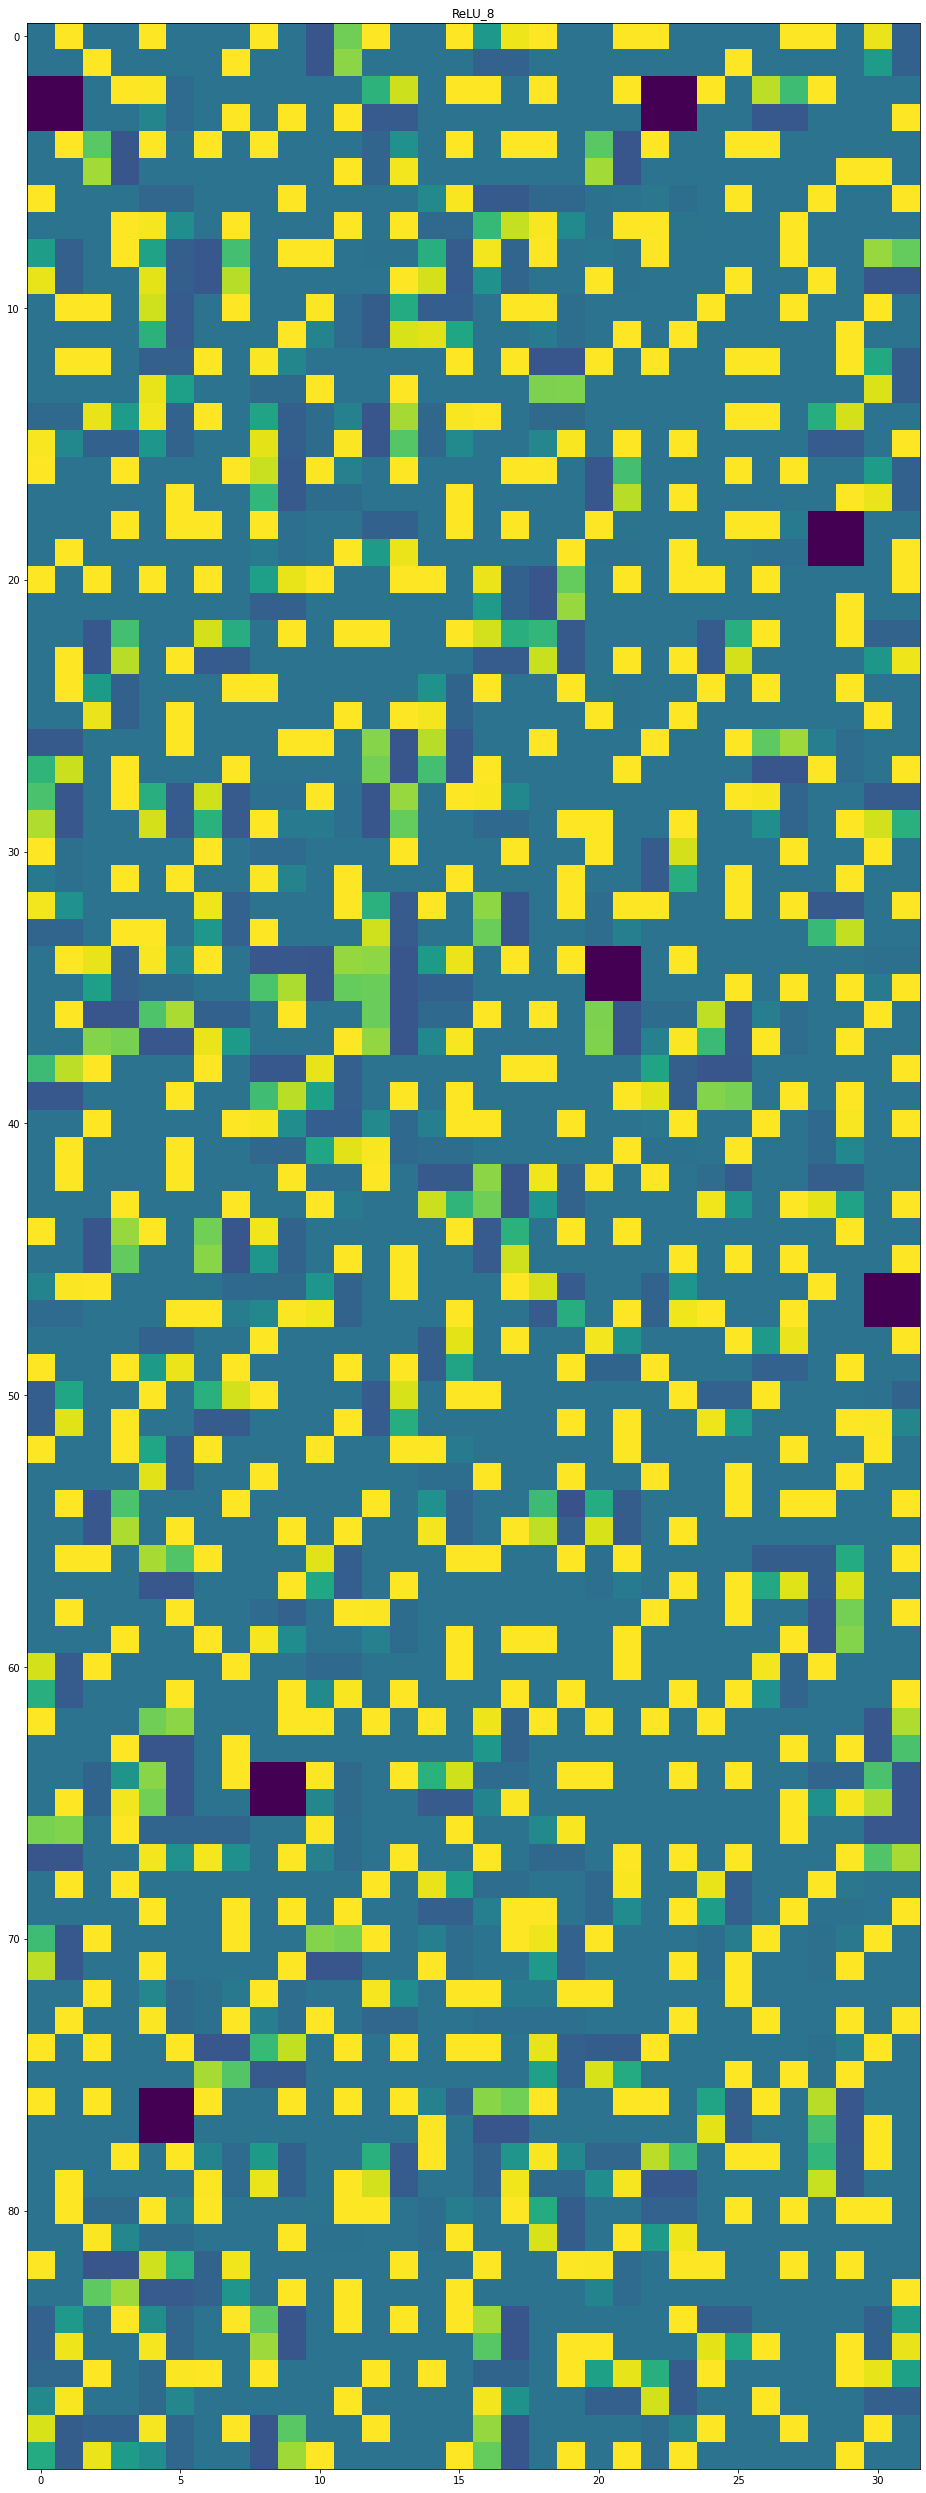

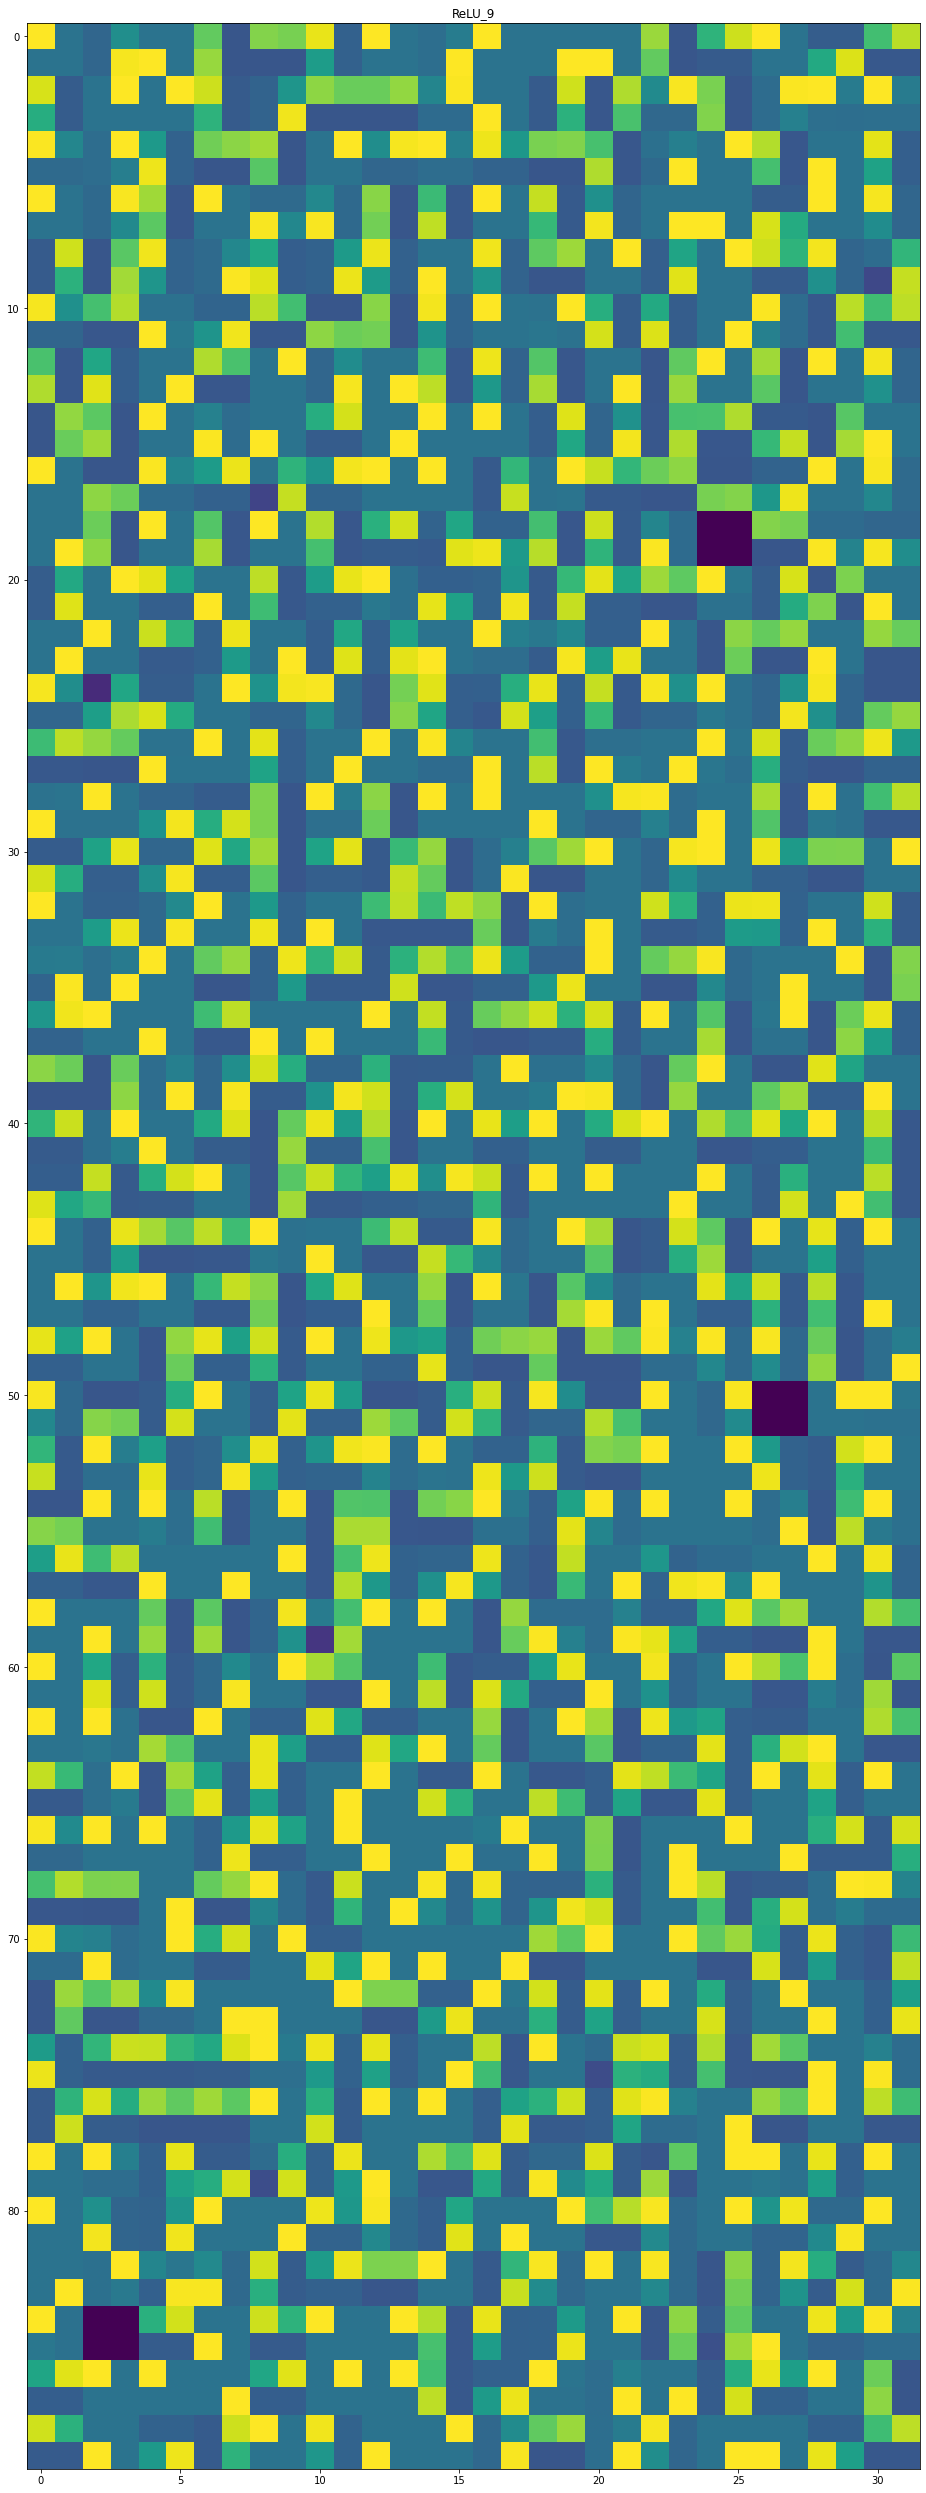

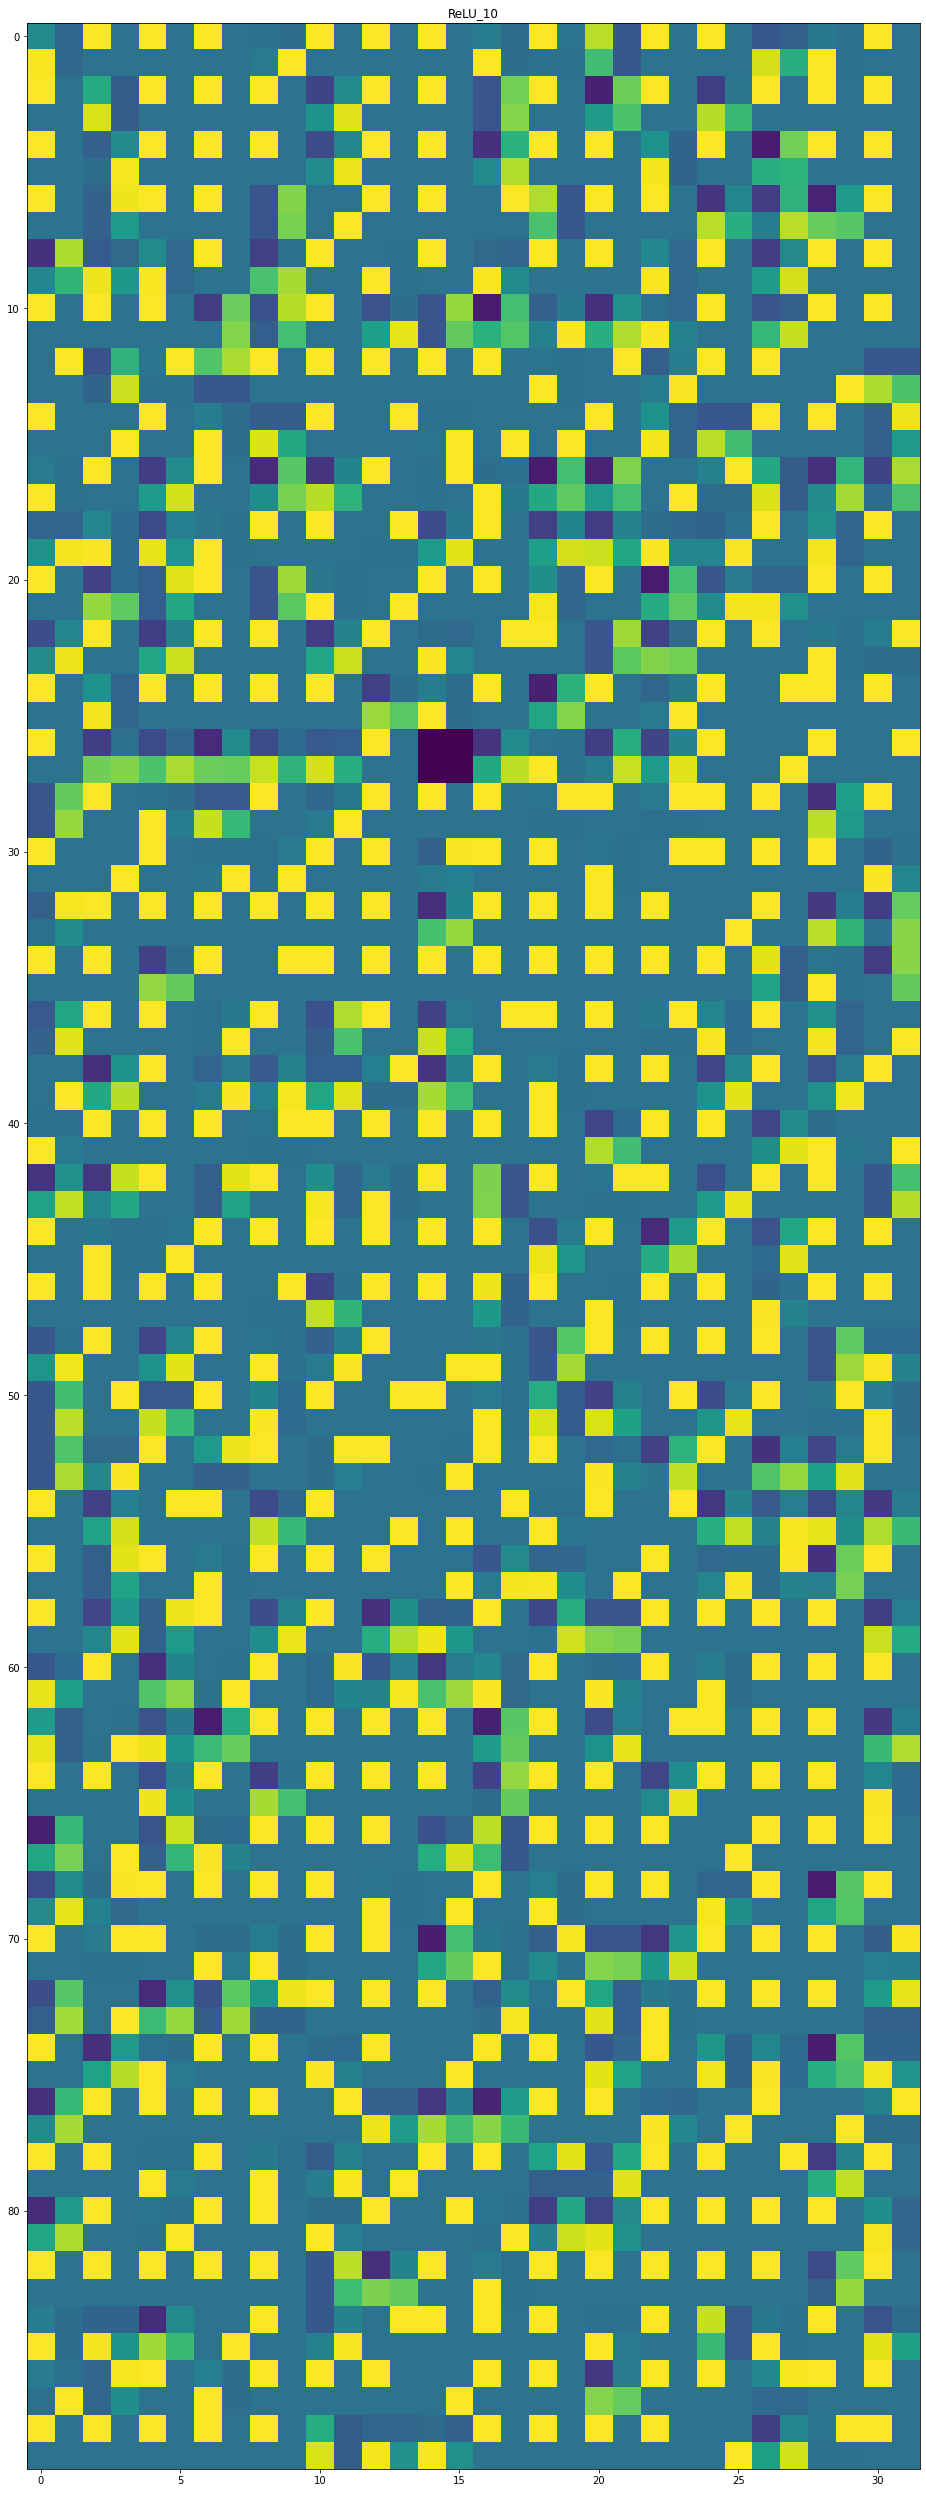

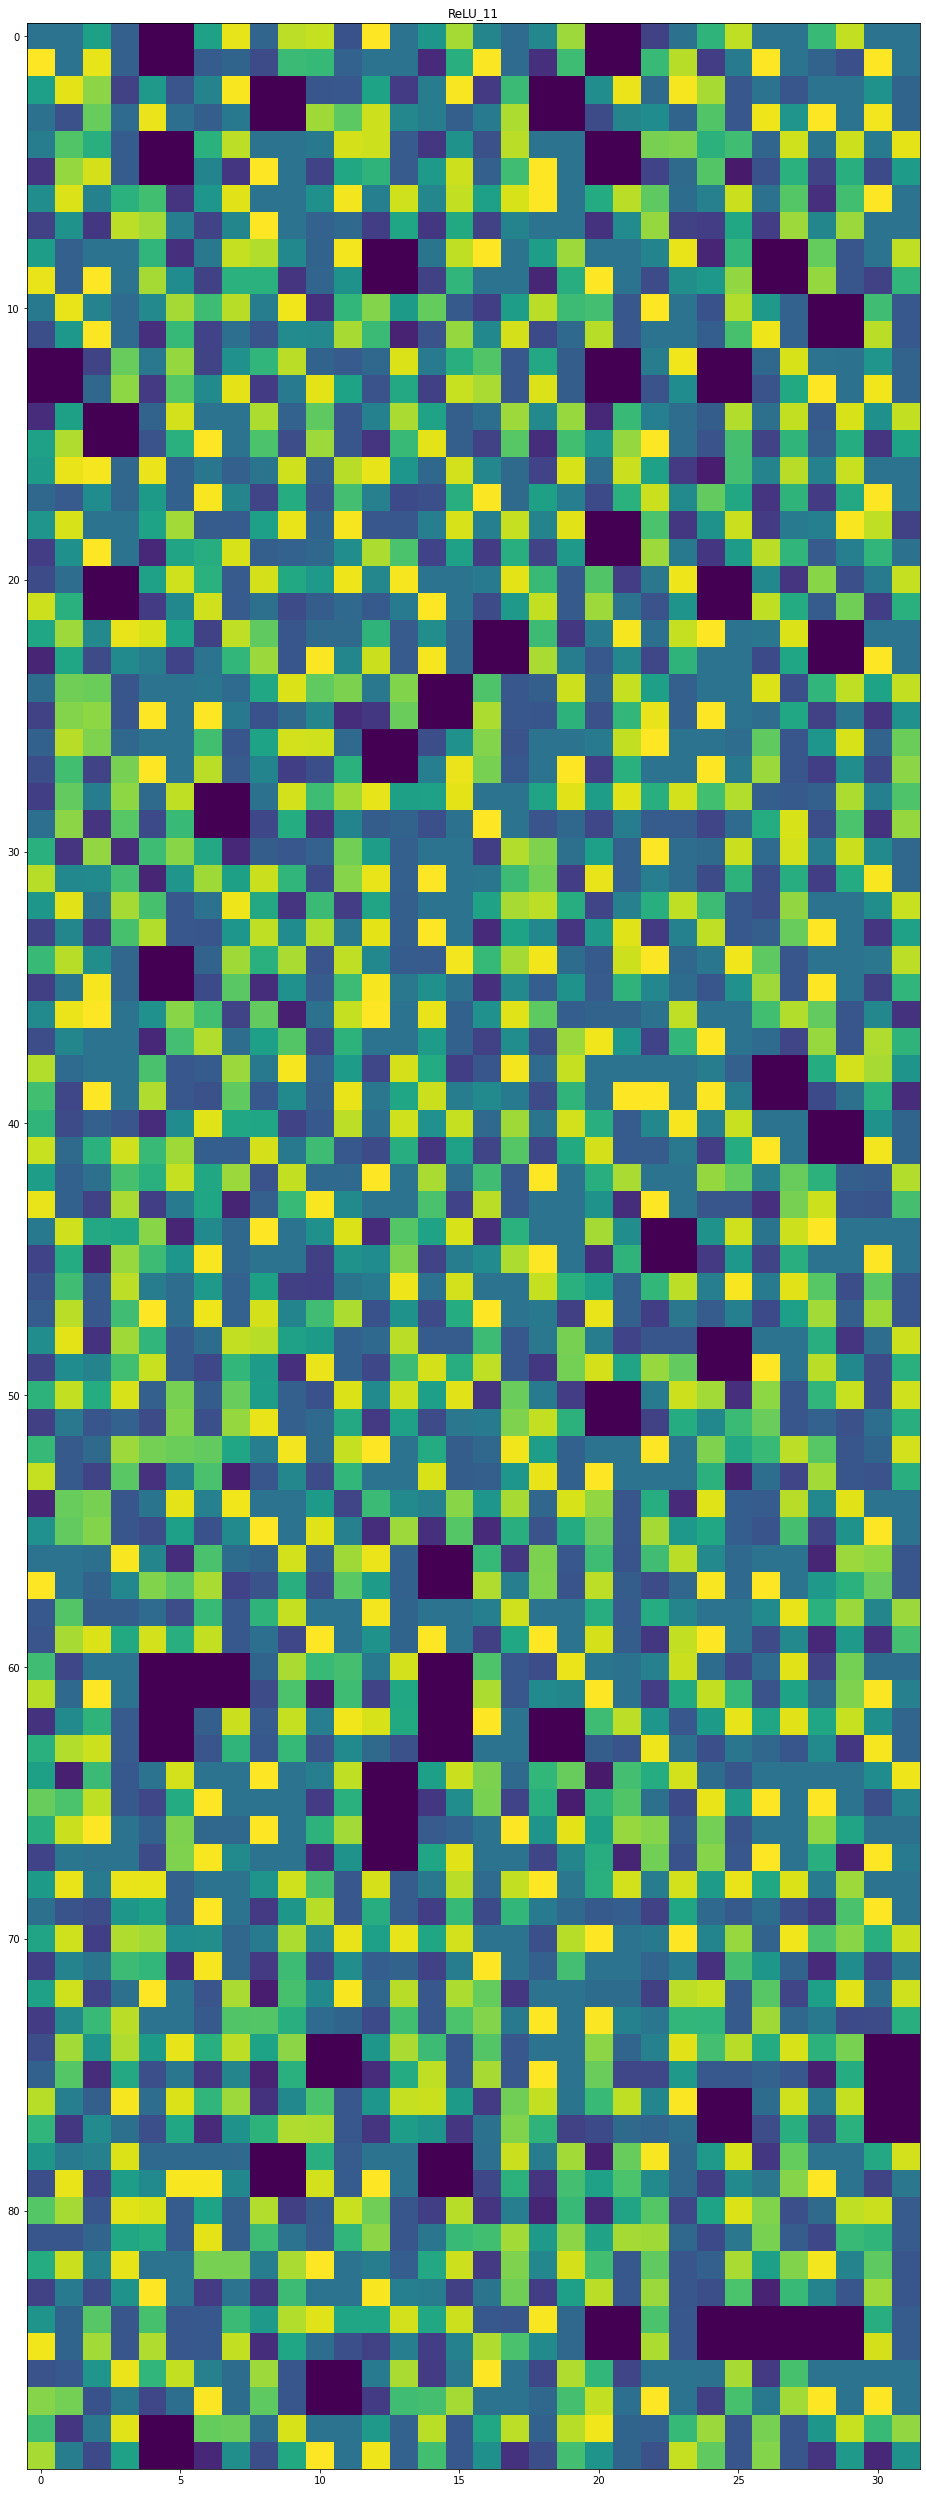

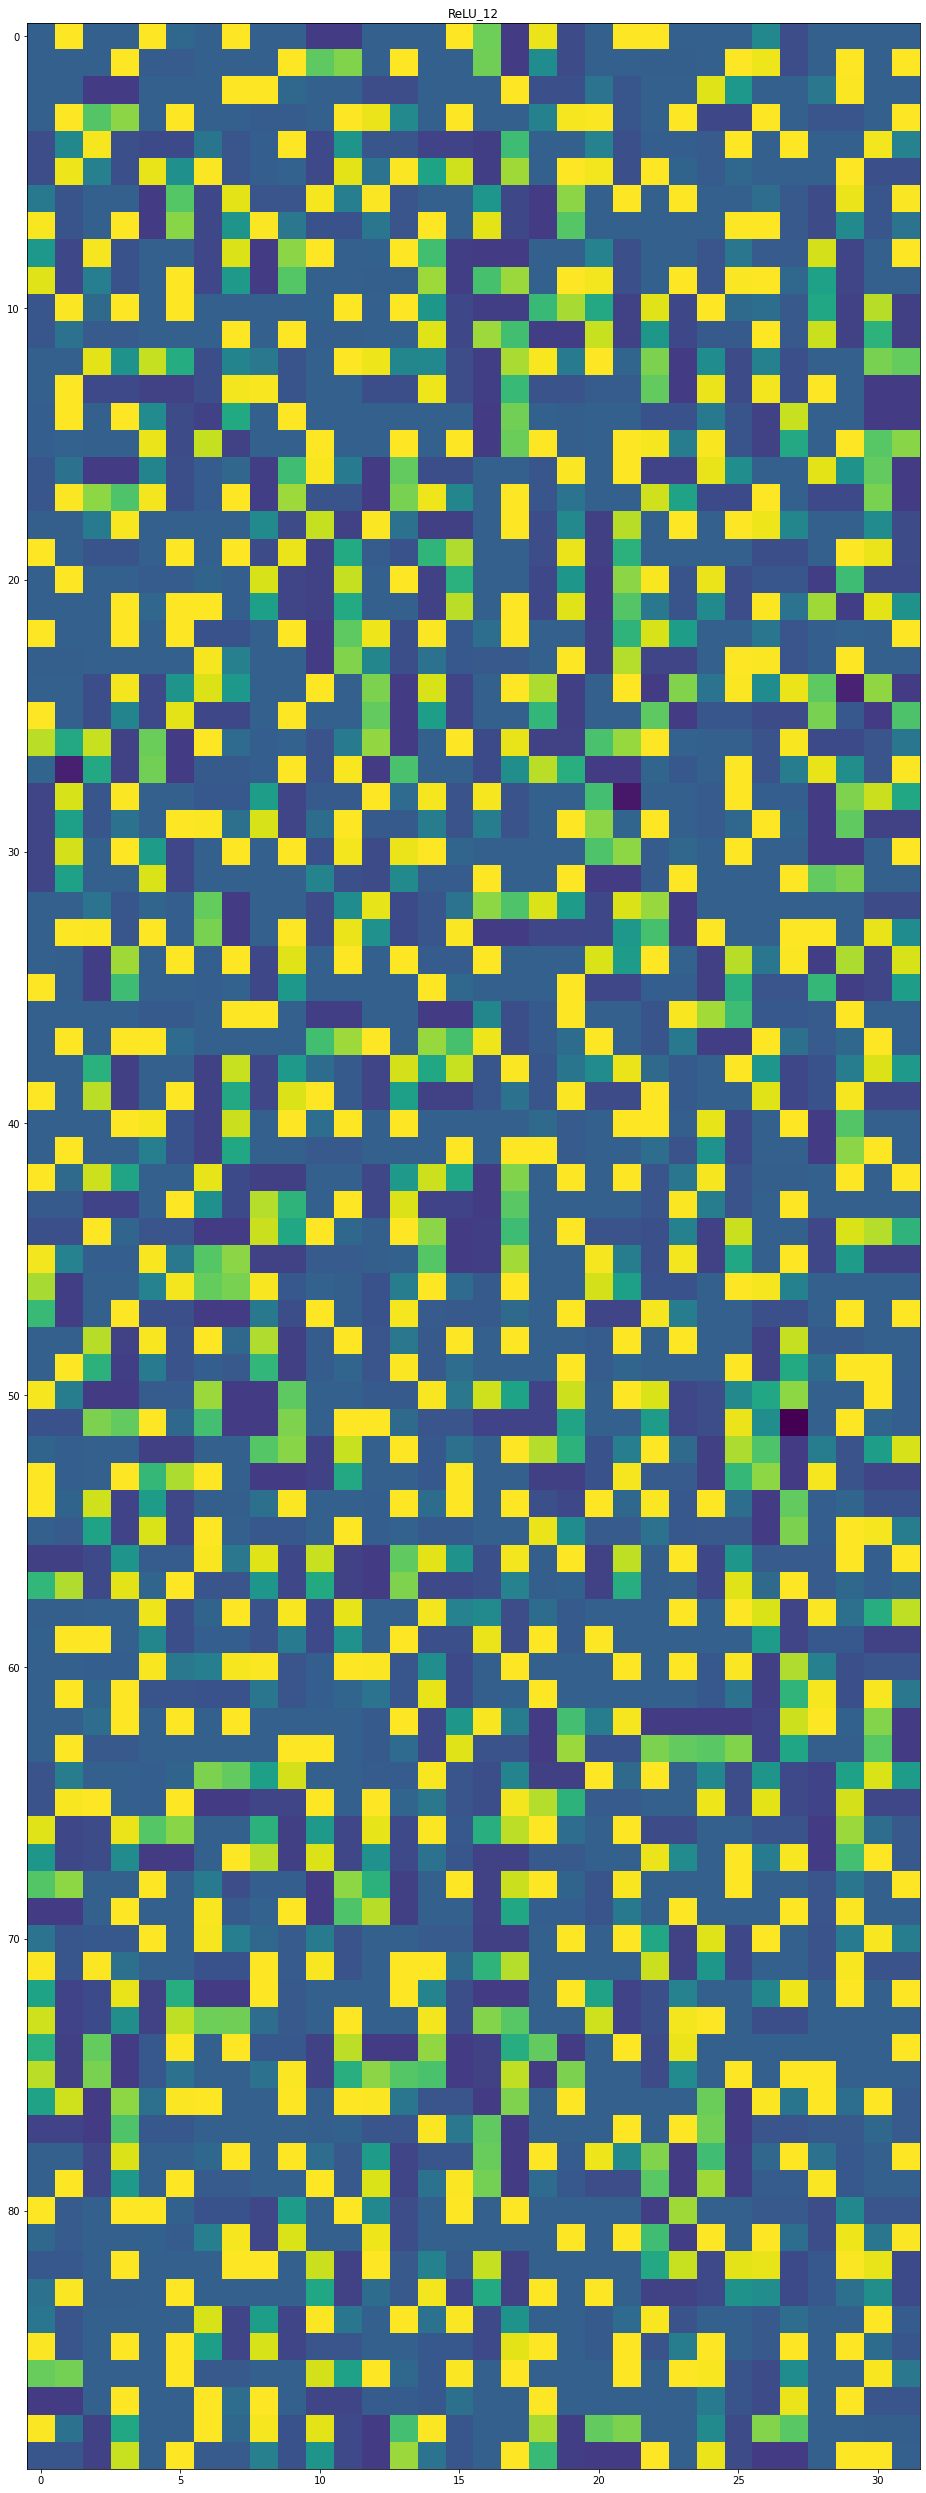

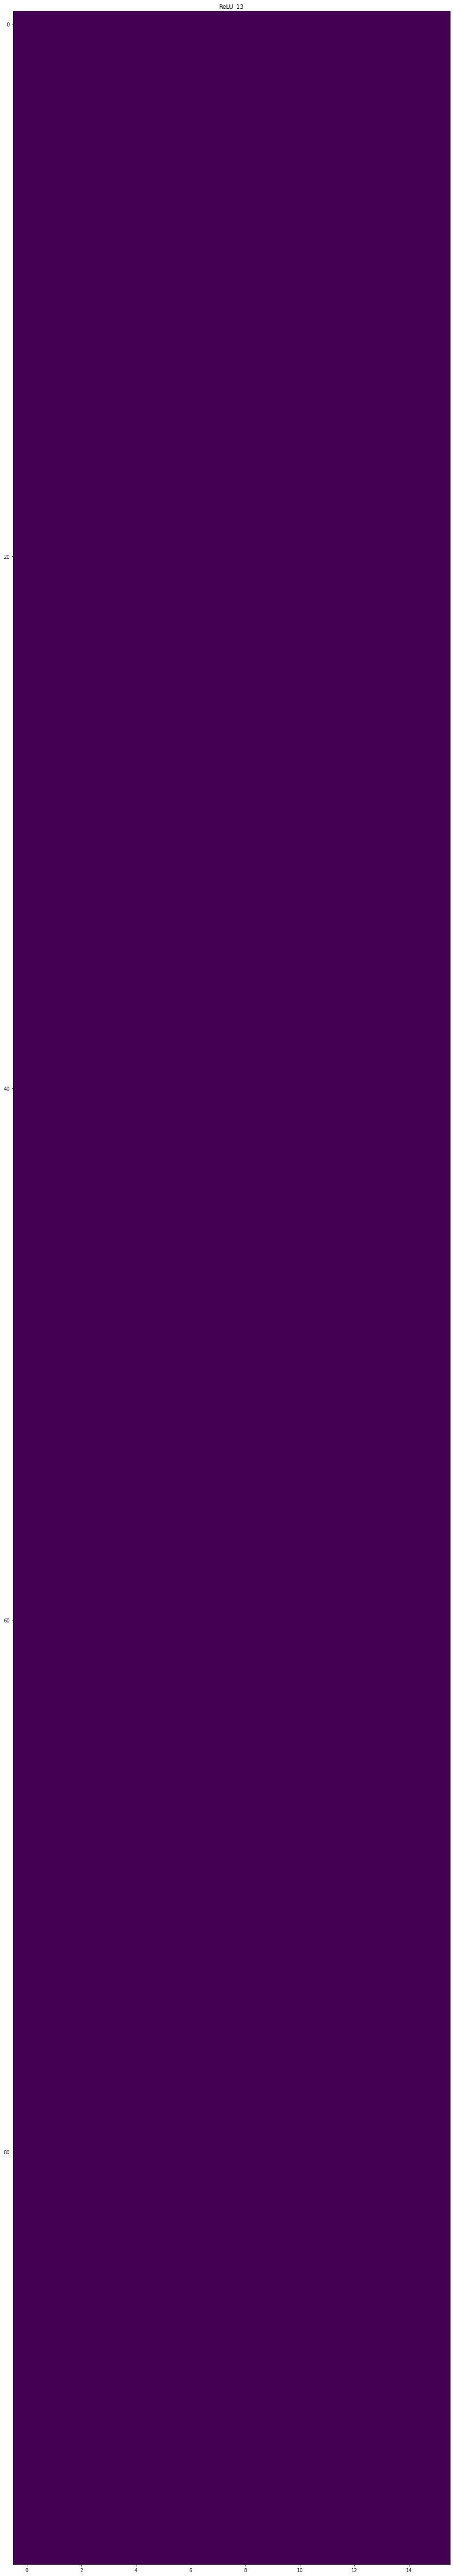

In [ ]:
plot_activations(activations_relu, 'ReLU_')

In [ ]:
layer_outputs = [layer.output for layer in model_elu.layers[:64]] 
activation_model = Model(inputs=model_elu.input, outputs=layer_outputs)
activations_elu = activation_model.predict(x_test[1:2])

The plot below shows all the activations for activation layers on the Xception model with ELU activation. Although this model performs better than with ReLU the activations look fairly similar to the visualizations look similar and show a similar pattern to the previous plot.

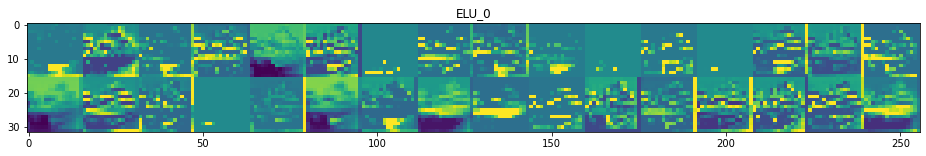

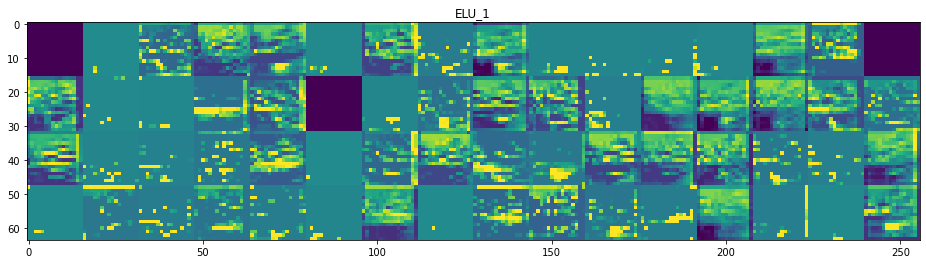

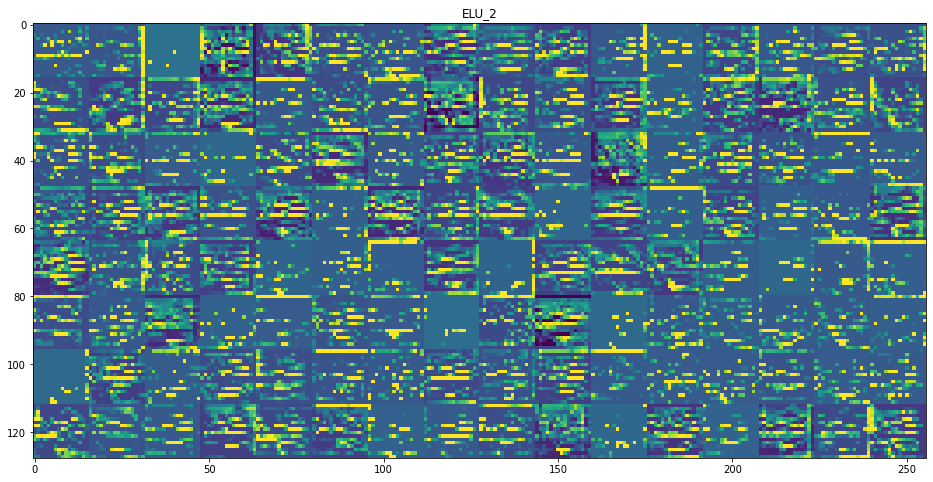

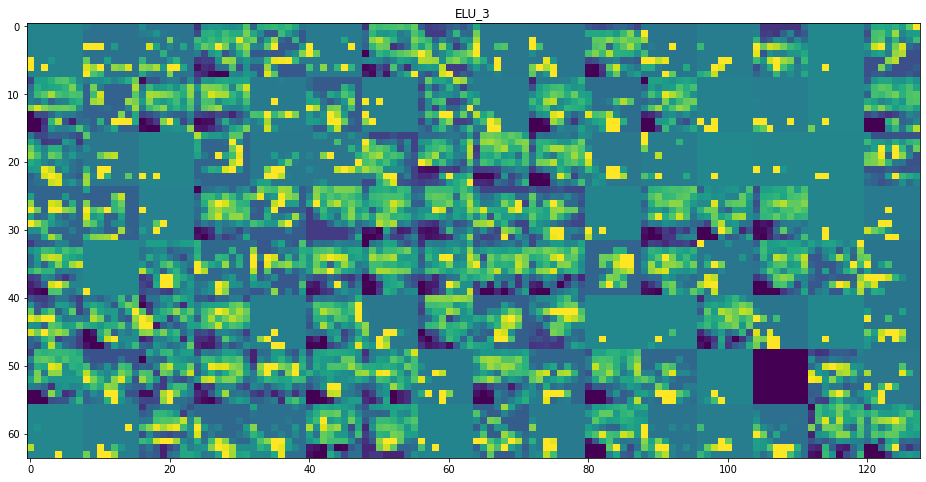

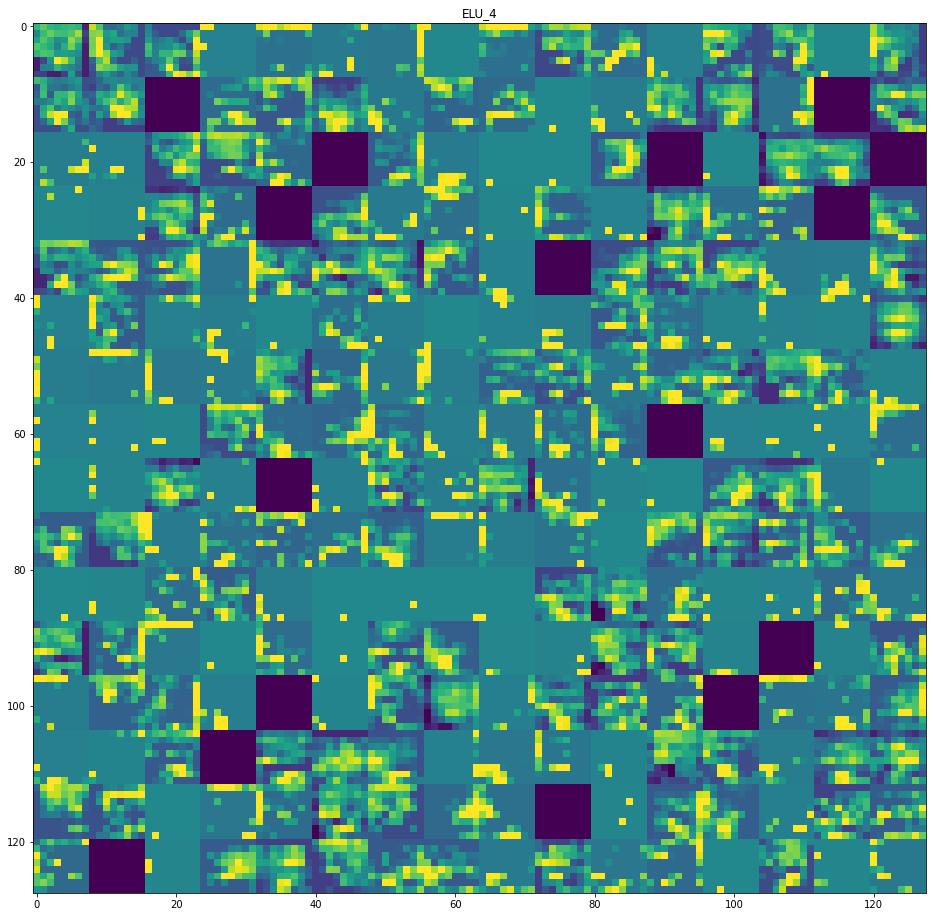

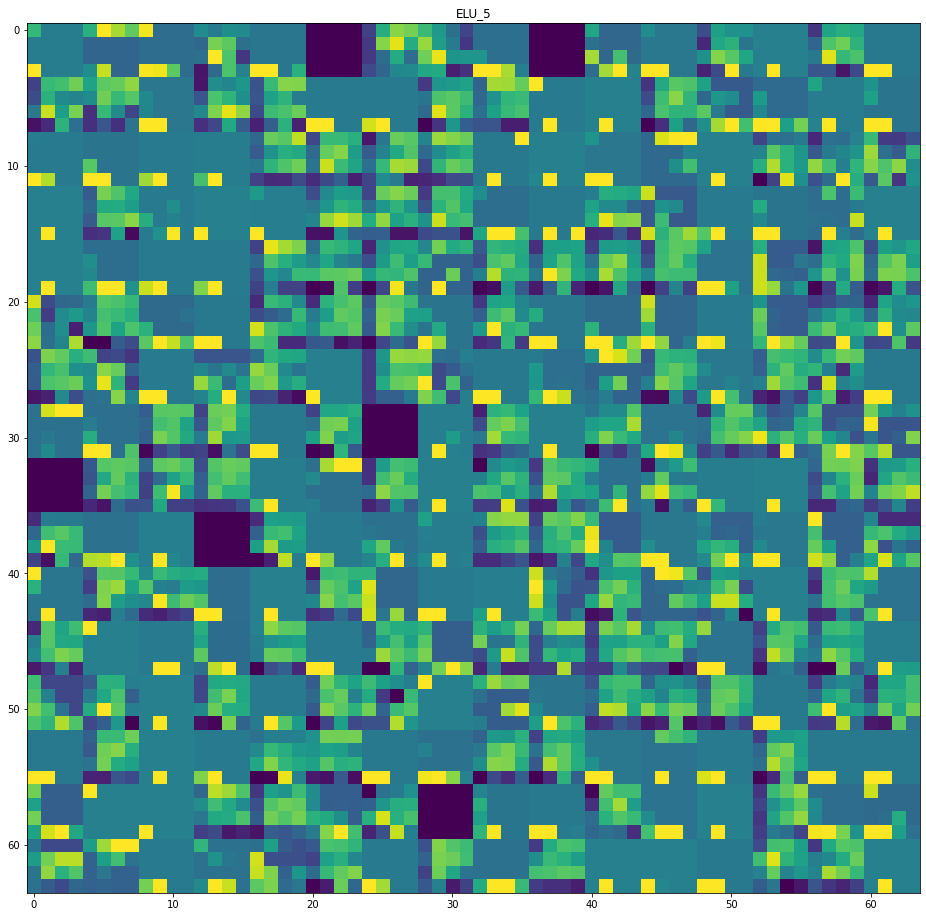

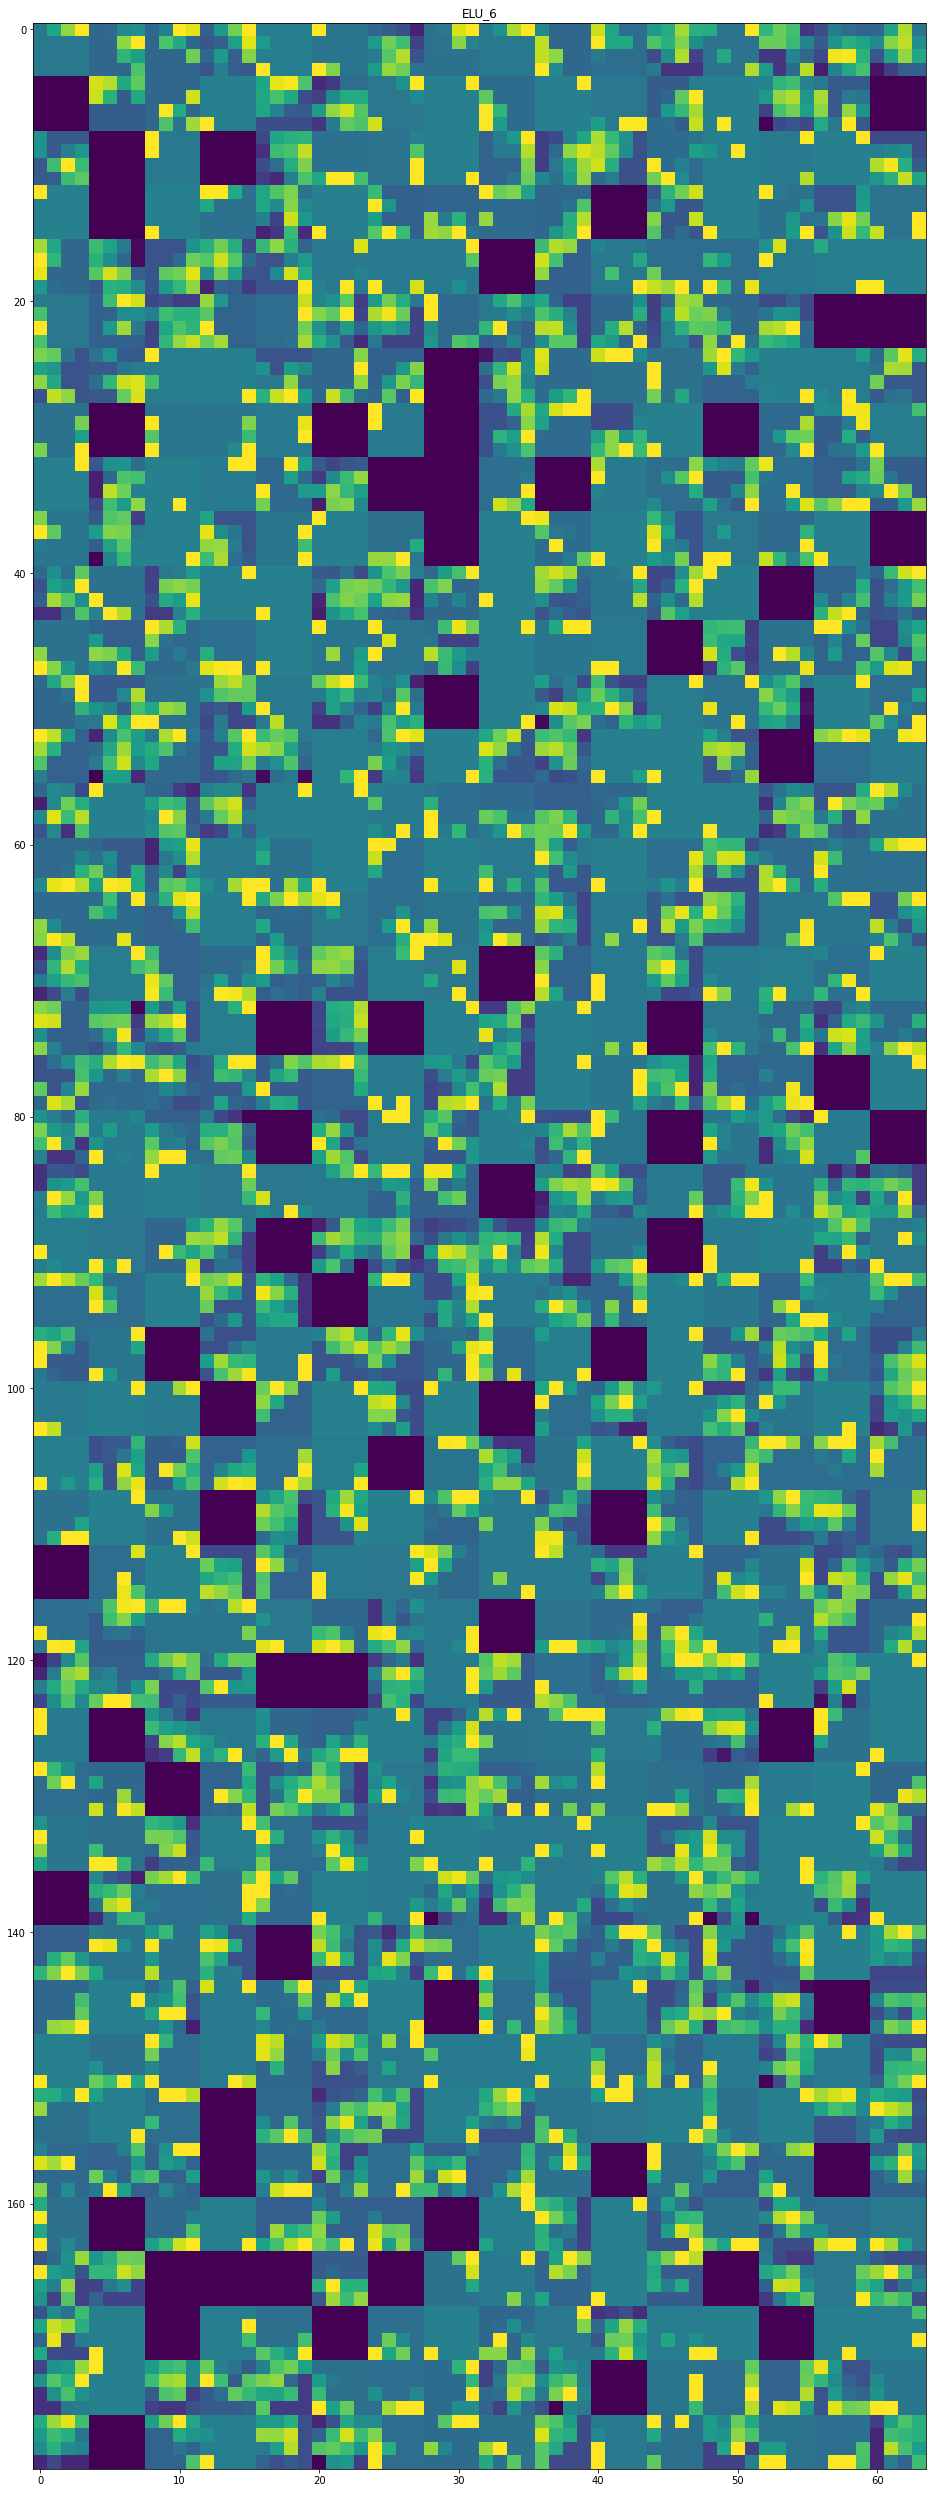

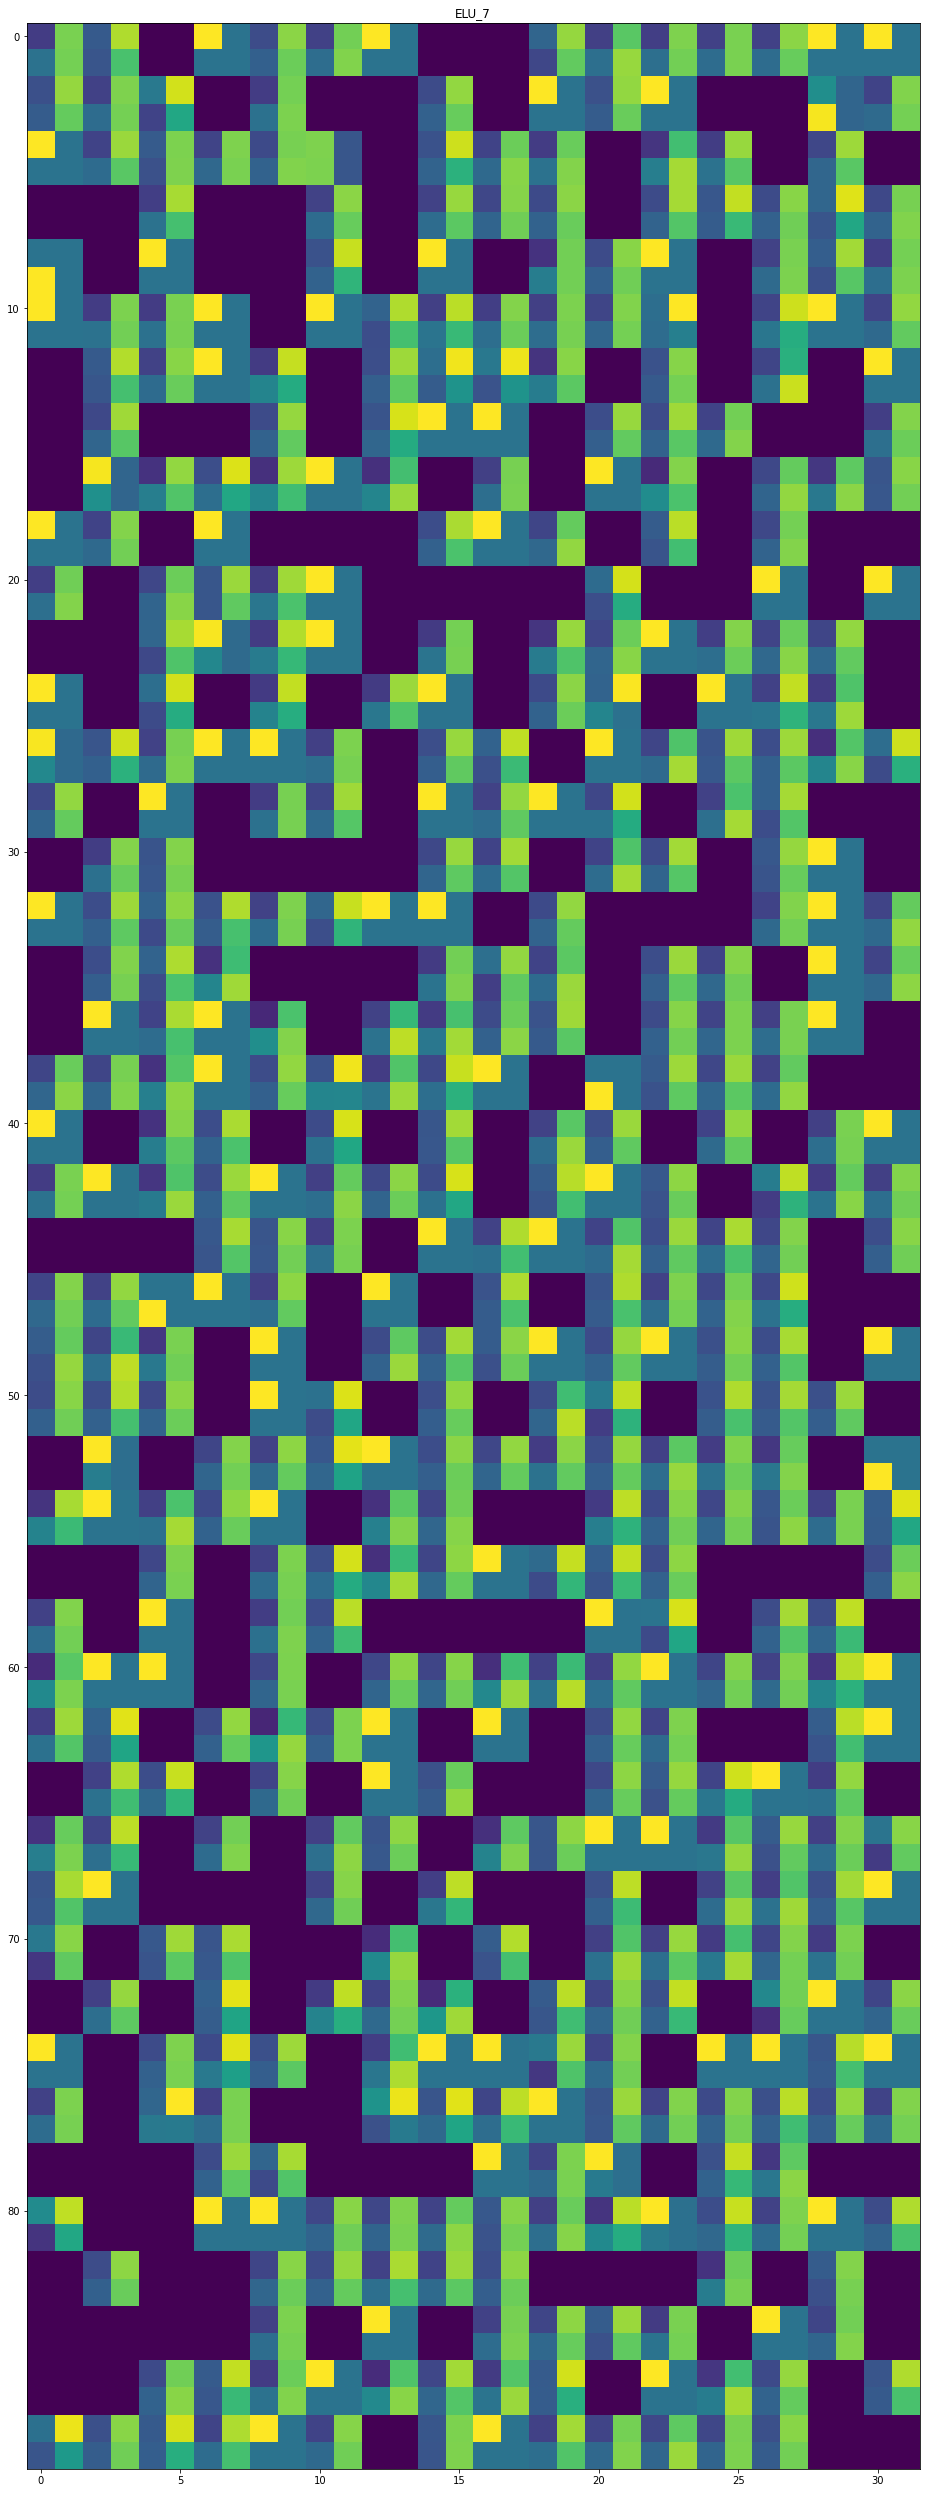

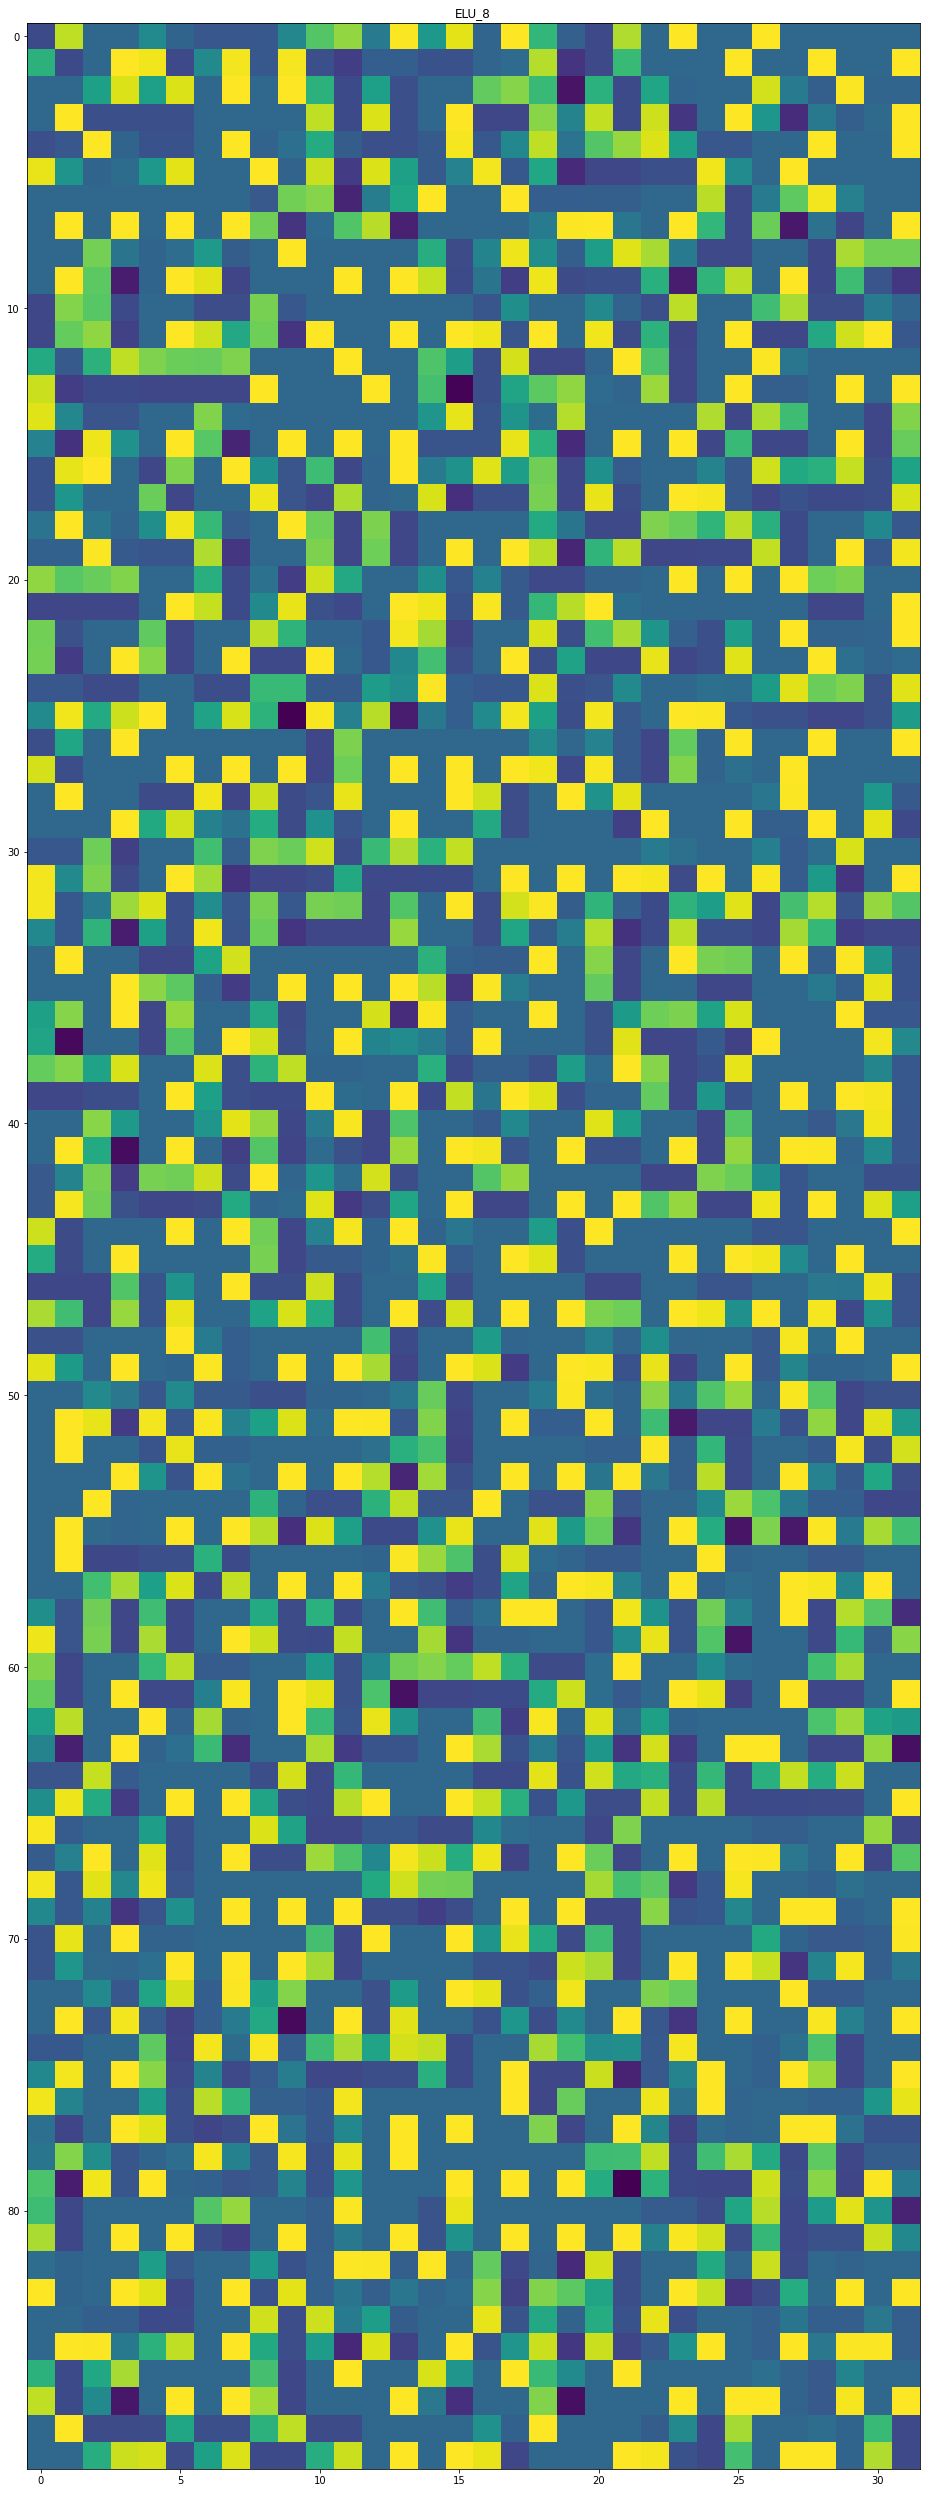

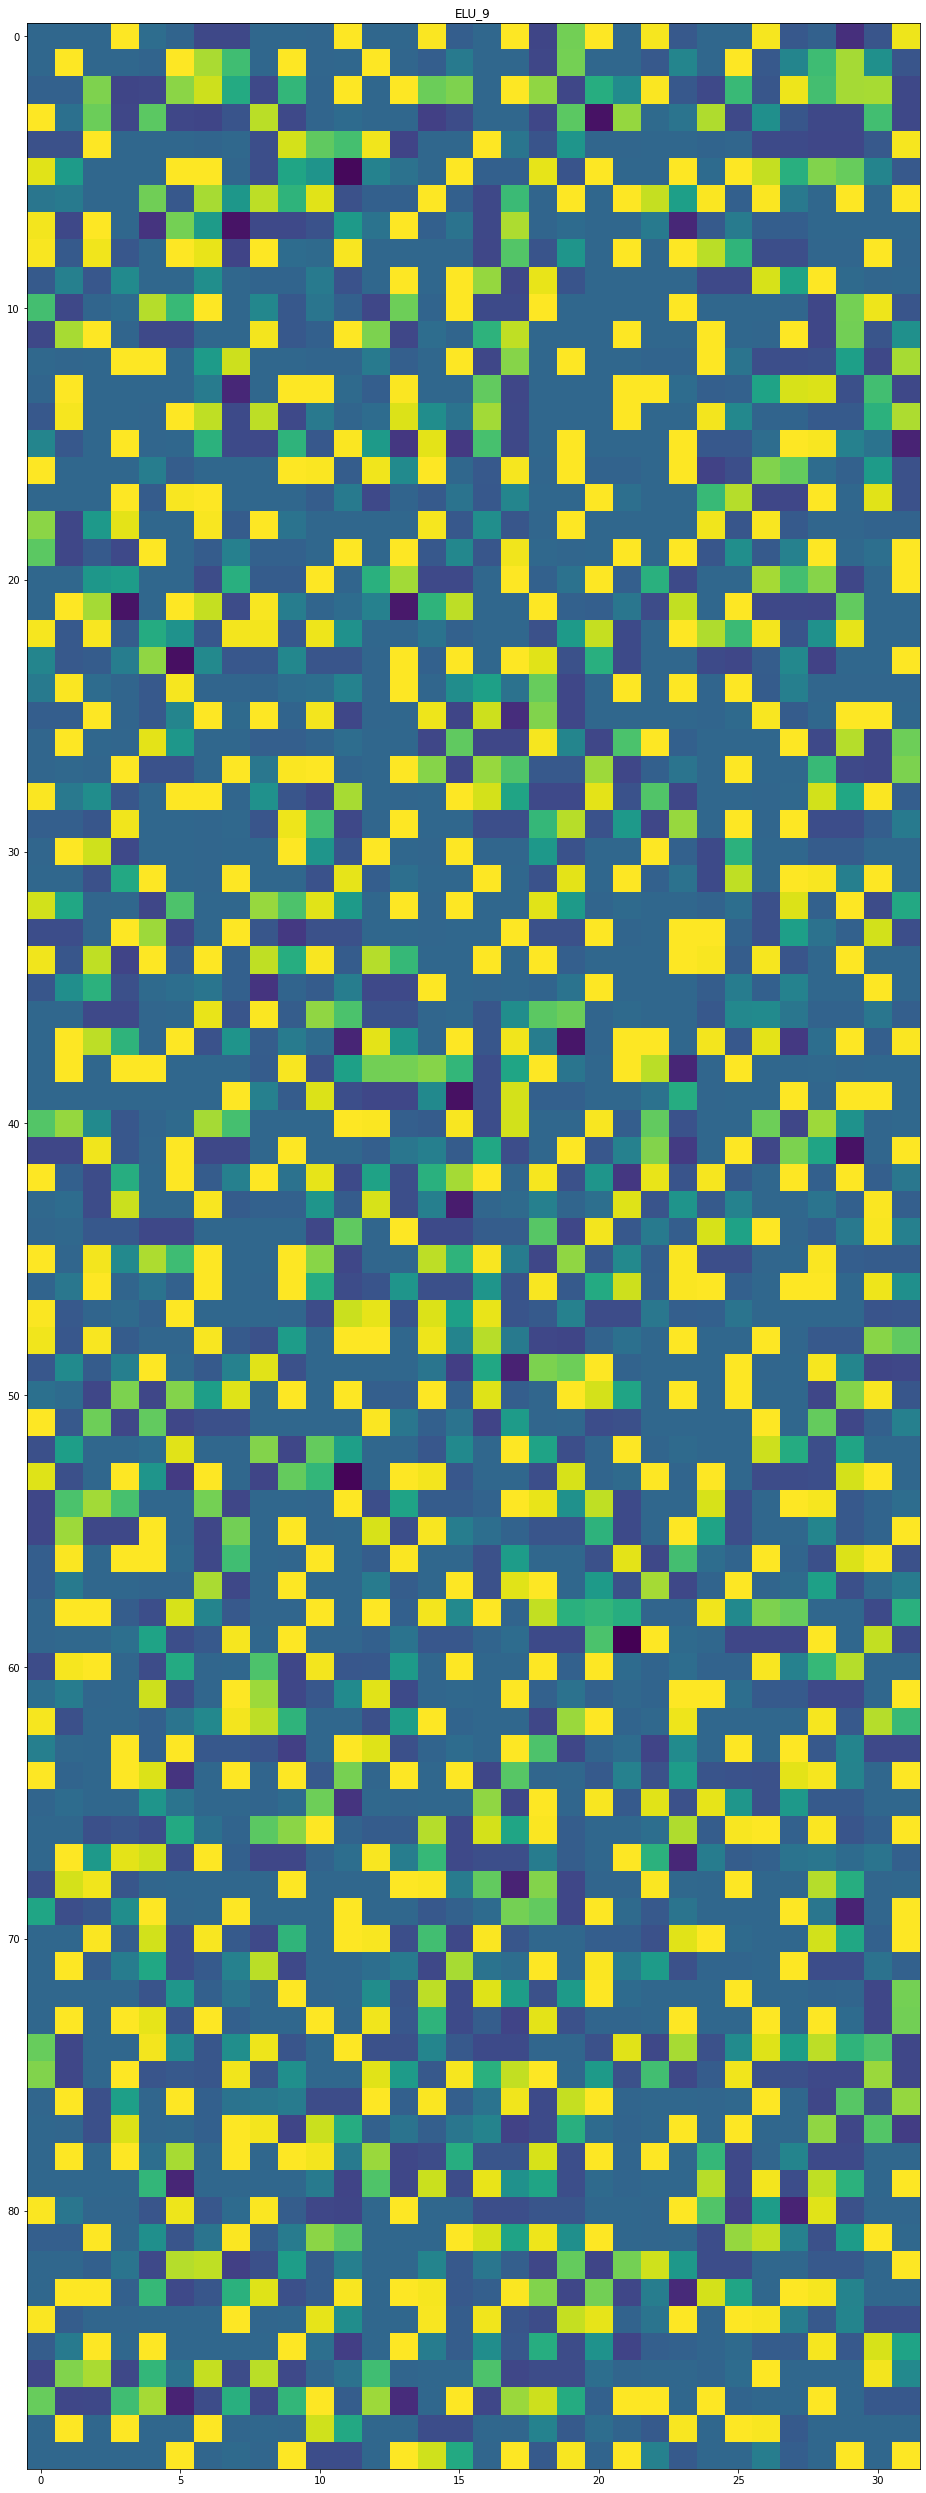

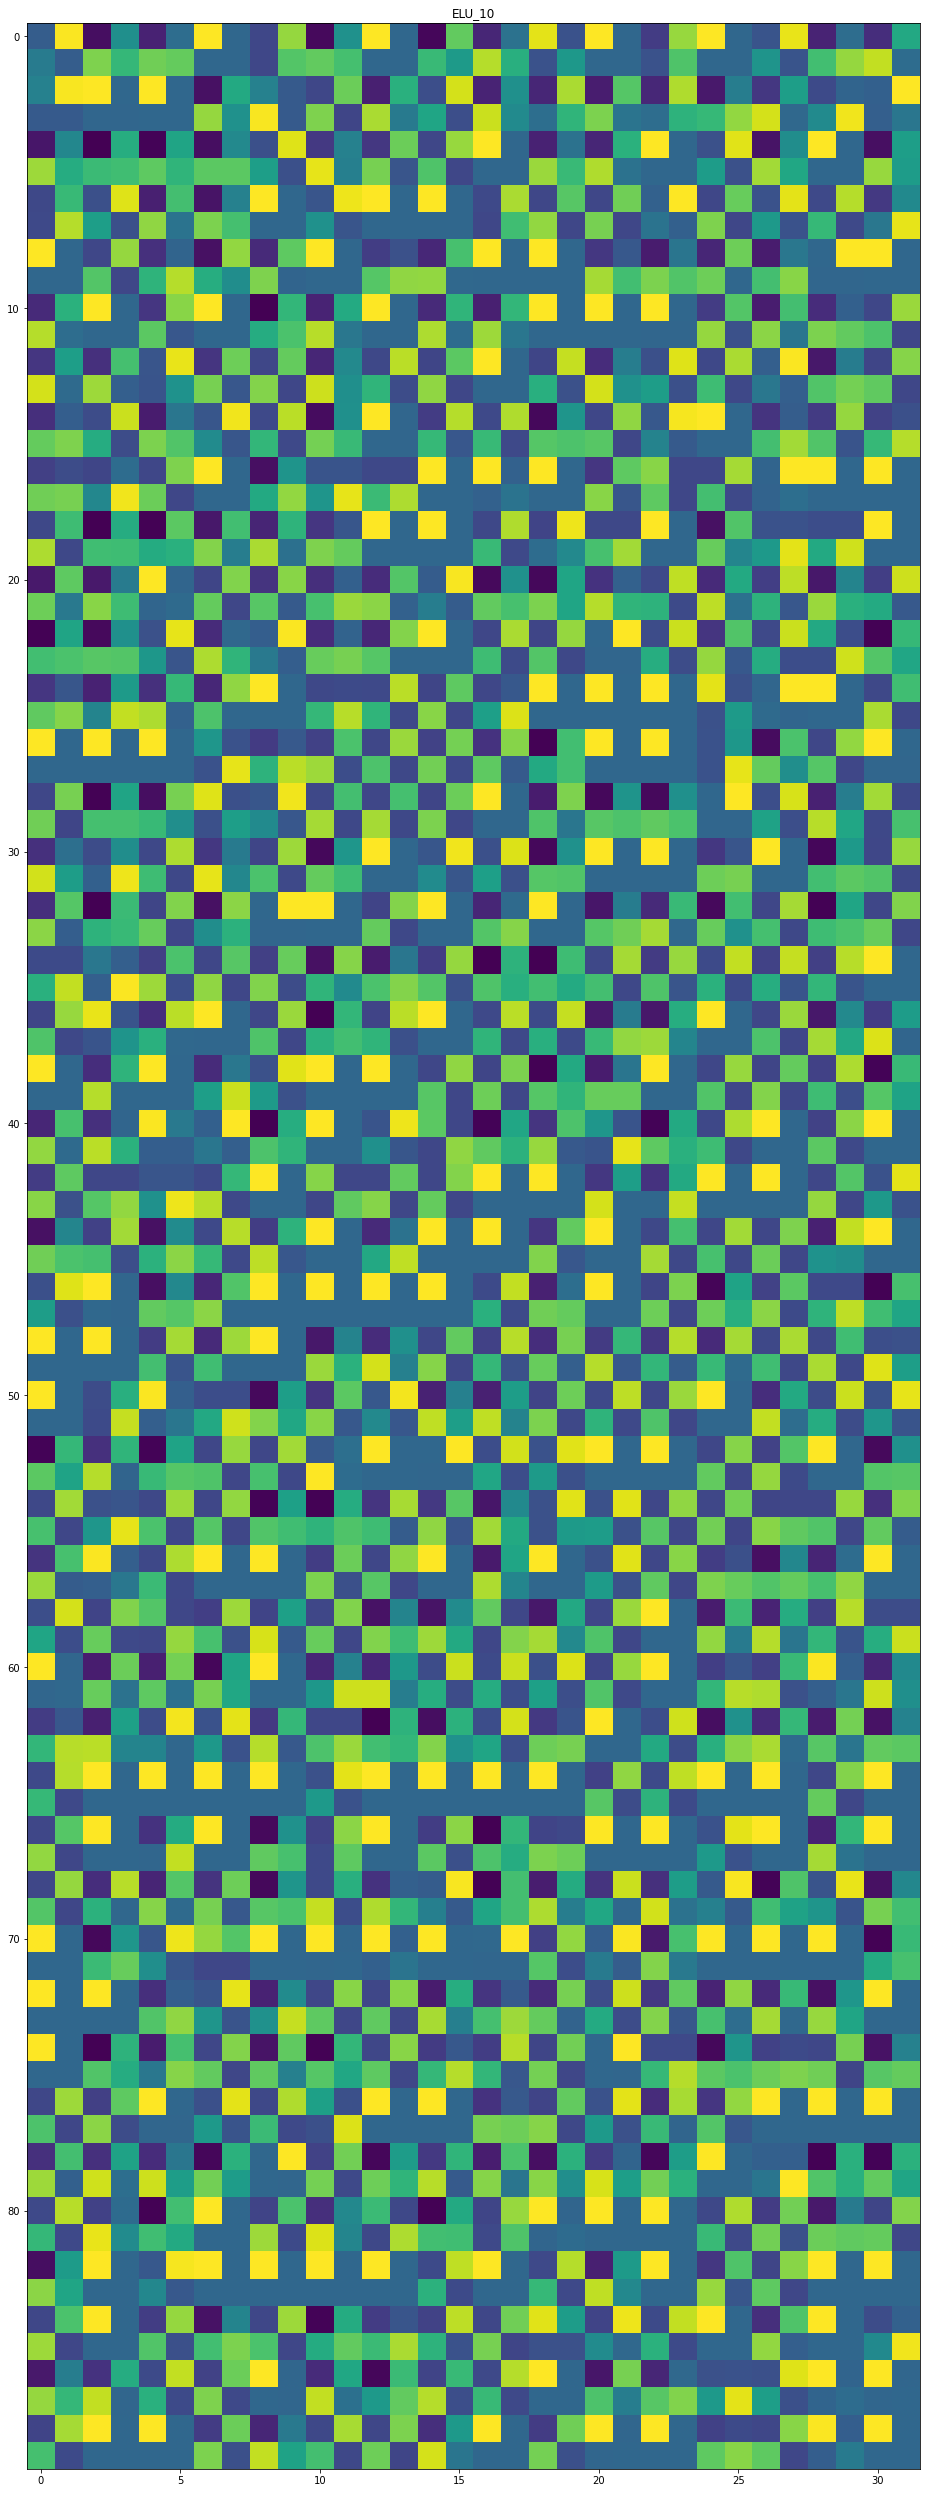

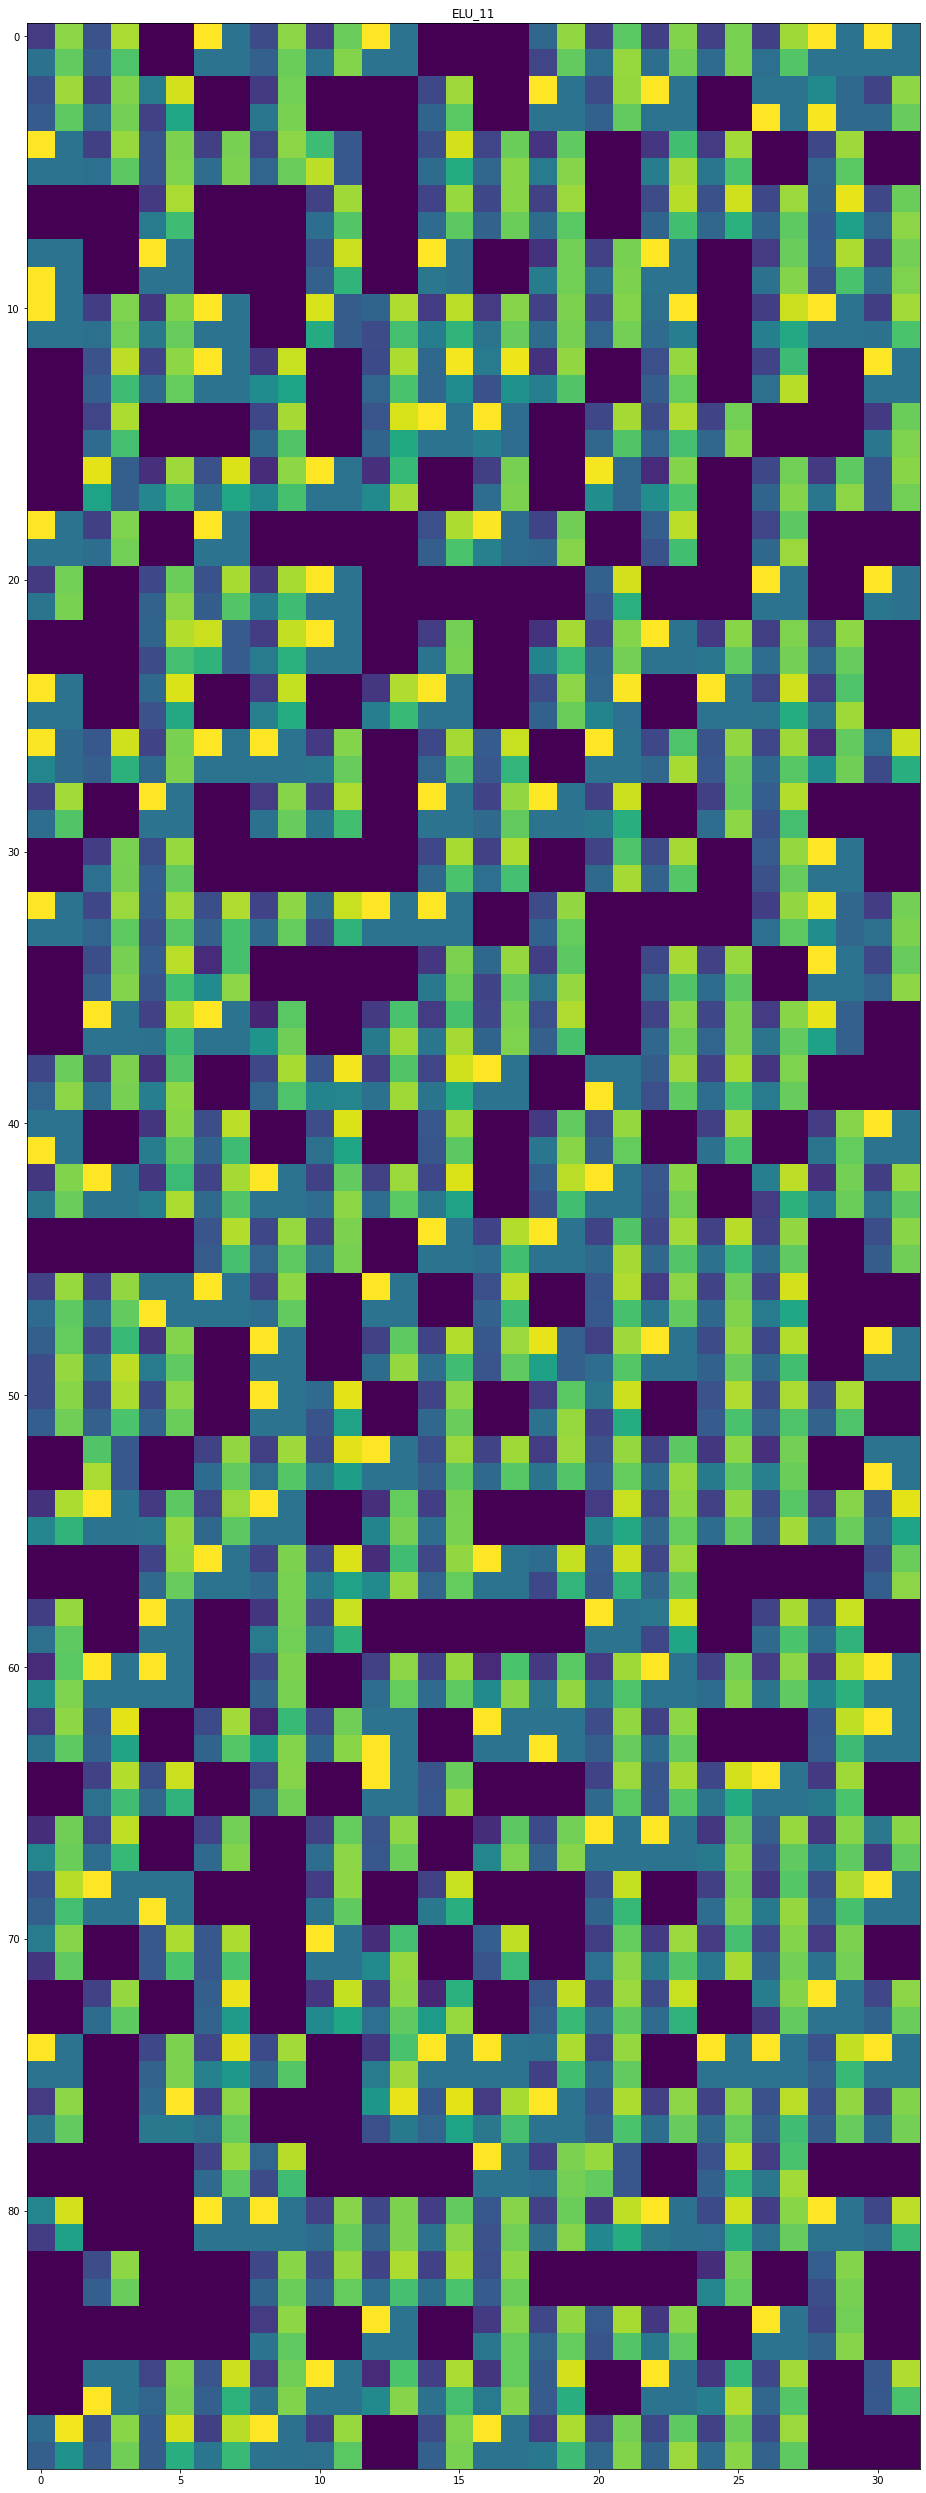

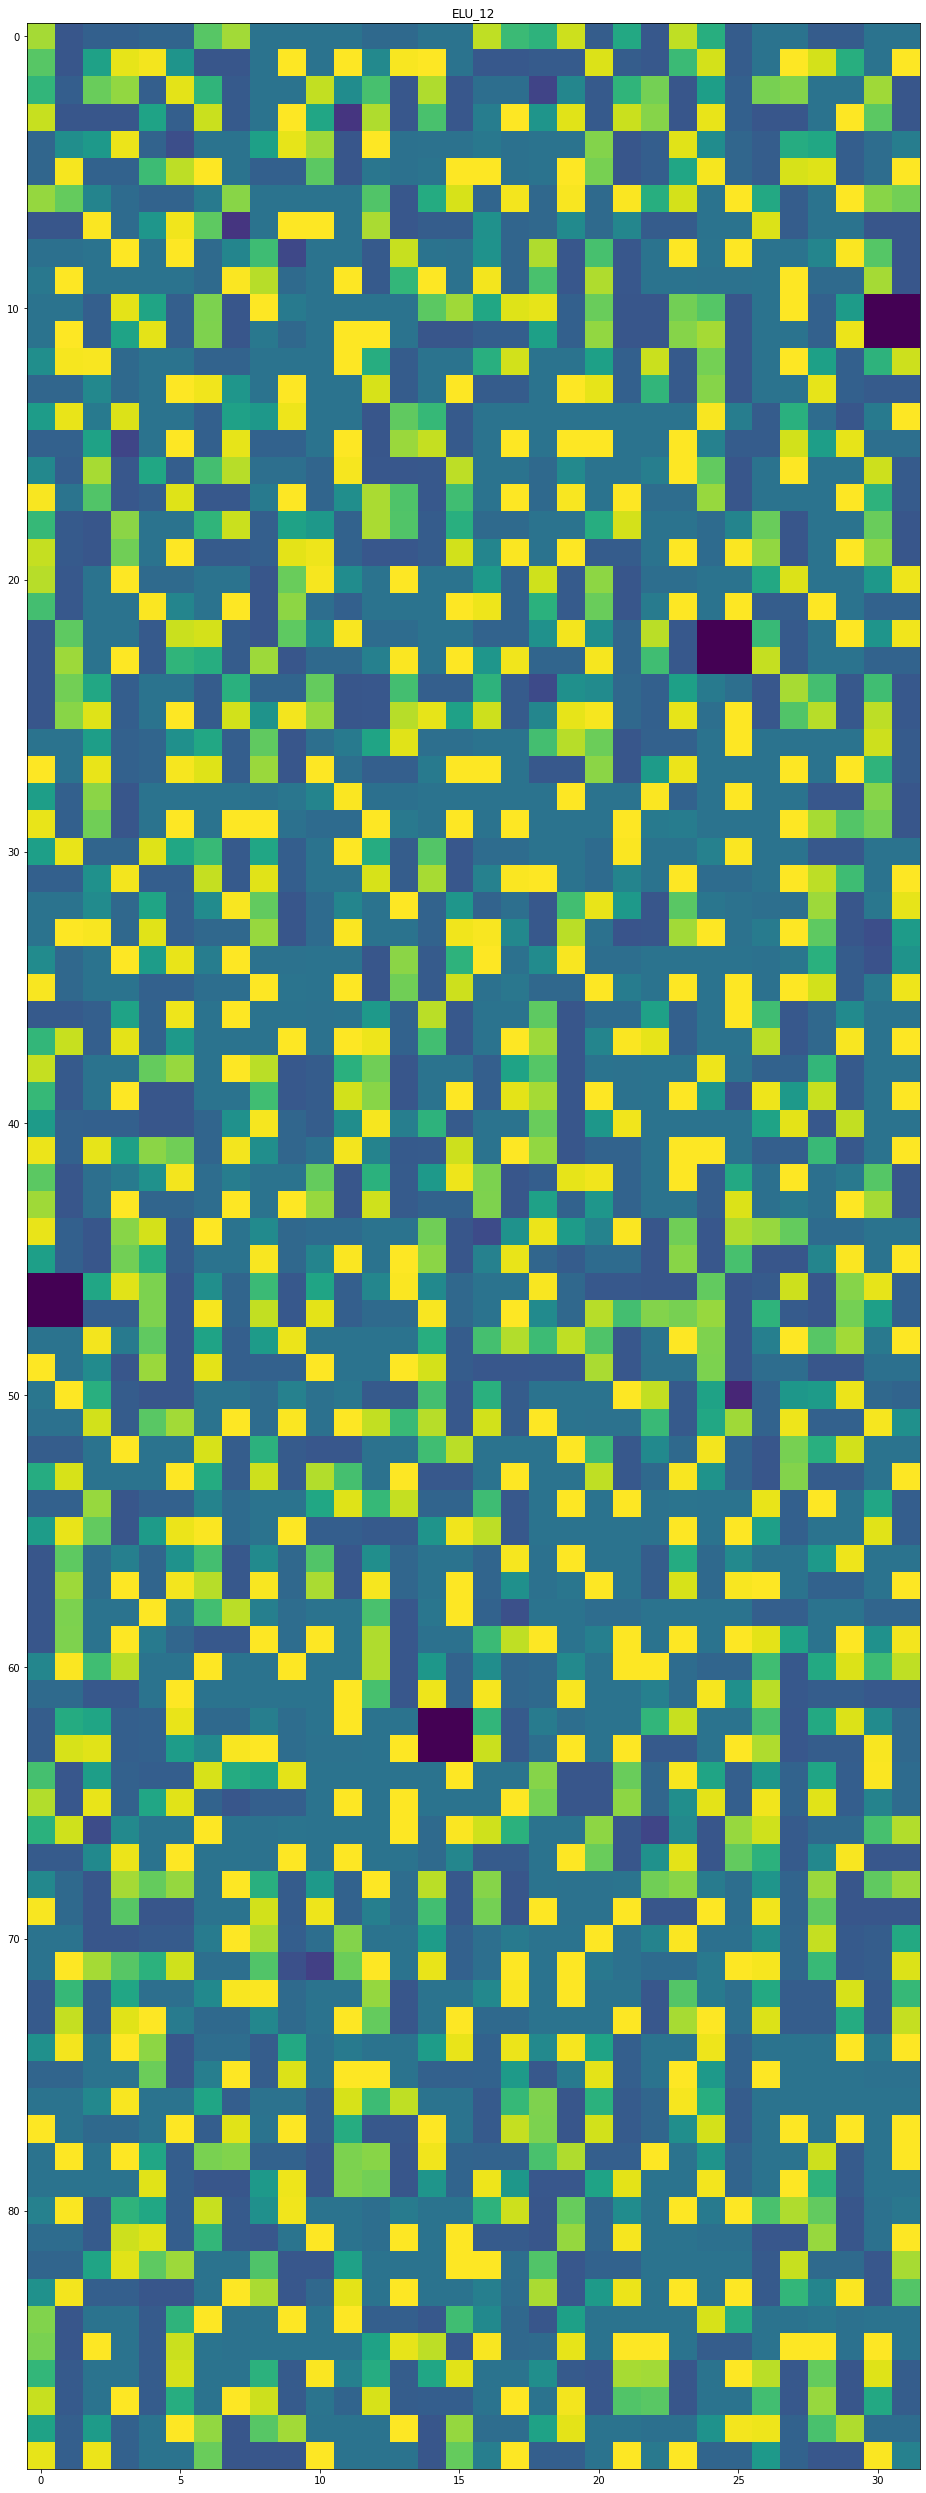

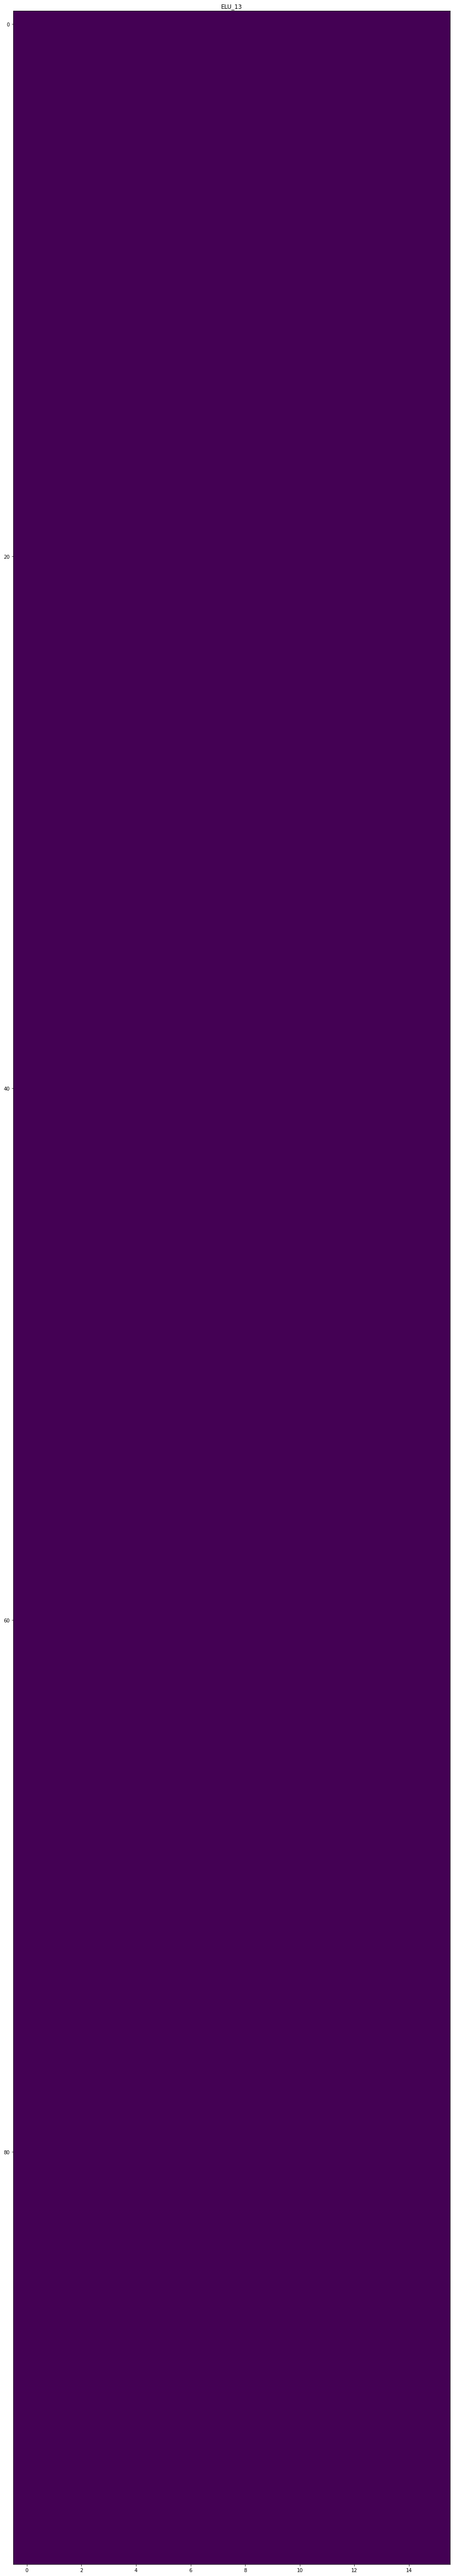

In [ ]:
plot_activations(activations_elu, 'ELU_')

# Summary

Visualizing layers of a network seems to a good way to get a better understanding of what is going on inside a network. While this method may not be precise enough to allow one to visualize and understand specific model differences such as why one activations function may be performing better than another it still is useful for seeing what is going on with the model in a more general sense. Such as the fact that the images in later activation seem like they may be too small to be provided too much useful information for classification.